# Курсовая работа по курсу математической статистики

Сааков А.С. СКБ182  
Версия от 10.11.2020

# Содержание
1. [Вероятностные распределения](#paragraph1)
    1. [Геометрическое распределение](#subparagraph1)
    2. [Распределение Максвелла](#subparagraph2)
2. [Основные понятия математической статистики](#paragraph2)
    1. [Геометрическое распределение](#subparagraph3)
    2. [Распределение Максвелла](#subparagraph4)
3. [Оценки](#paragraph3)
    1. [Геометрическое распределение](#subparagraph5)
    2. [Распределение Максвелла](#subparagraph6)
    3. [Работа с данными](#subparagraph7)
4. [Проверка статистических гипотез](#paragraph4)
    1. [Геометрическое распределение](#subparagraph8)
    2. [Распределение Максвелла](#subparagraph9)
5. [Различение гипотез](#paragraph5)
6. [Линейная регрессия и метод наименьших квадратов](#paragraph6)
7. [Литература](#paragraph7)

## 1. Домашнее задание. Вероятностные распределения <a name="paragraph1"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import scipy.stats as sts
from scipy.stats import geom
from random import random
from collections import Counter
import copy
import math
from math import *
from random import *
import pandas as pd
import calendar
import statsmodels.api as sm

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

## 1.1. Геометрическое распределение <a name="subparagraph1"></a>

### 1.1.1. Описание основных характеристик распределения

Функция вероятности дискретного распределения: $P_\xi(x) = pq^x, x \in \{0,1,2,...\}$  
Математическое ожидание:  
$$M\xi=\sum_{k=1}^{\infty}kpq^{k-1}=p\sum_{k=1}^{\infty}kq^{k-1}=p\sum_{k=1}^{\infty}\frac{dq^k}{dq}=p\frac{d}{dq}(\sum_{k=1}^{\infty}q^k)=p\frac{d}{dq}(\frac{q}{1-q})=p\frac{1}{(1-q)^2}=\frac{1}{p}$$
Дисперсия:  
$$D\xi=M(\xi-M\xi)^2=M\xi^2-(M\xi)^2=M(\xi(\xi-1)+\xi)-M\xi^2=M(\xi(\xi-1))+M\xi-(M\xi)^2=M(\xi(\xi-1))+M\xi(1-\xi)$$
$$M(\xi(\xi-1))=p\sum_{k=1}^{\infty}k^2q^{k-1}=pq\sum_{k=0}^{\infty}\frac{d^2q^k}{dq^2}=pq\frac{d^2}{dq^2}(\sum_{k=0}^{\infty}q^k)=pq\frac{d^2}{dq^2}(\frac{1}{1-q})=pq\frac{2}{(1-q)^3}=\frac{2q}{p^2}$$
$$D\xi = M\xi^2+M\xi-(M\xi)^2=\frac{2q}{p^2}+\frac{1}{p}-\frac{1}{p^2}=\frac{2q-1}{p^2}+\frac{1}{p}=\frac{2q-1+p}{p^2}=\frac{2q-1+1-q}{p^2}=\frac{q}{p^2}$$

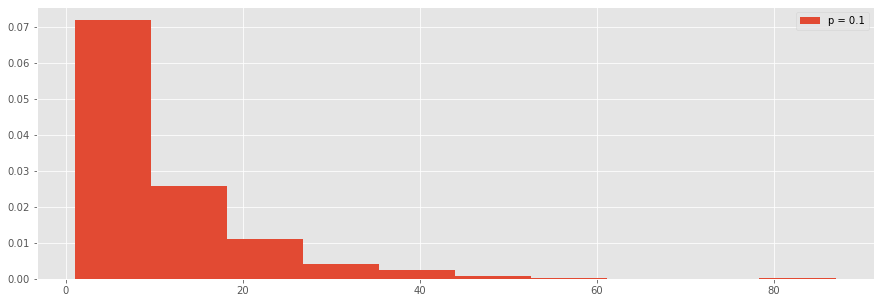

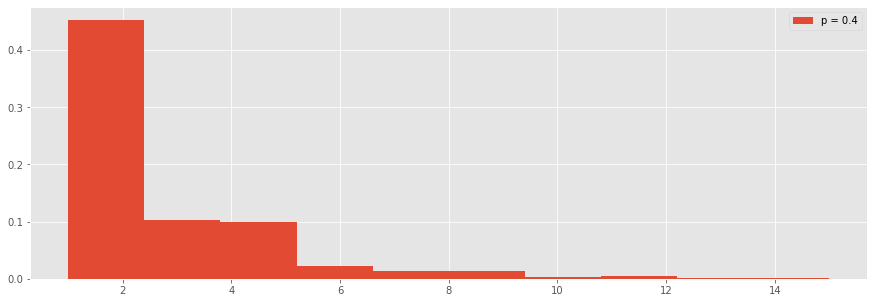

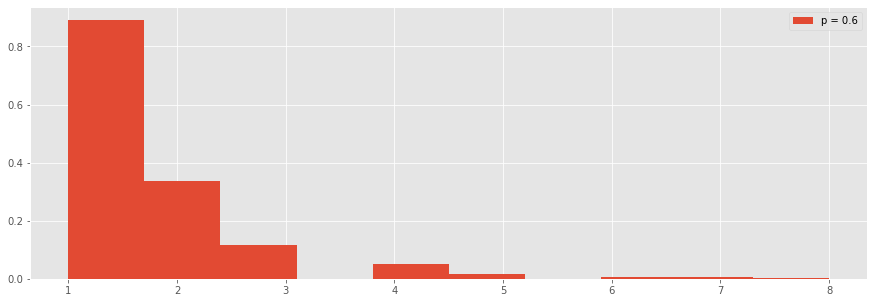

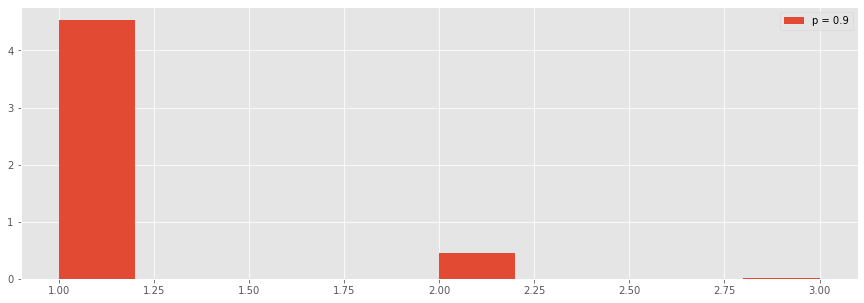

Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения


In [2]:
for p in [0.1, 0.4, 0.6, 0.9]:
    geom_rv = sts.geom(p)
    sample = geom_rv.rvs(1000)
    plt.hist(sample, density = True, label='p = {}'.format(p))
    plt.legend()
    plt.show()
print('Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения')

Мода $M_0$ - значение во множестве наблюдений, которое встречается наиболее часто, для дискретной случайной величины определяется с помощью гистограммы вероятностей.  
Из гистограмм видно, что $M_0 = 1$

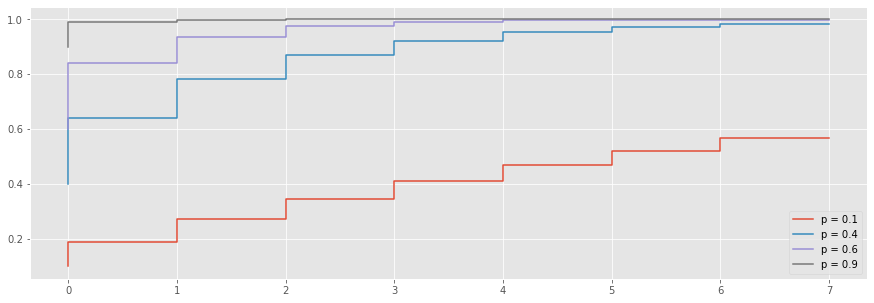

Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения


In [3]:
for p in [0.1, 0.4, 0.6, 0.9]:
    n = np.arange(0, 8, 1)
    plt.step(n, 1-(1-p)**(n+1), label='p = {}'.format(p))
    plt.legend()
plt.show()
print('Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения')

Медиана Ме находится из уравнения $P_\xi(x)=0.5$  
$\begin{cases}
    p+qp+q^2p+...+q^{Me-1}p \geq \frac{1}{2}\\
    q^{Me-1}p+q^{Me}p+q^{Me+1}p+... \geq \frac{1}{2}
  \end{cases}$  
$\begin{cases}
    p \frac{1-q^{Me}}{1-q} \geq \frac{1}{2}\\
    q^{Me-1}p\frac{1}{1-q} \geq \frac{1}{2}
  \end{cases}$  
$\begin{cases}
    1-q^{Me} \geq 2^{-1}\\
    q^{Me-1} \geq 2^{-1}
  \end{cases}$  
$\begin{cases}
    q^{Me} \leq 2^{-1}\\
    q^{Me-1} \geq 2^{-1}
  \end{cases}$  
$\begin{cases}
    Me \cdot log_2q \leq -1\\
    (Me-1)log_2q \geq -1
  \end{cases}$   
Отсюда $-\frac{1}{log_2q} \leq Me \leq 1-\frac{1}{log_2q}$

### Примеры событий, которые могут быть описаны выбранными случайными величинами

Типичные интерпретации геометрического распределения: описывает количество испытаний n до первого успеха при вероятности наступления успеха в каждом испытании p. Если n подразумевается номер испытания, в котором наступил успех, то геометрическое распределение будет описываться следующей формулой:
$$Geom_p(n)=q^{n-1}p$$
Геометрическое распределение считается дискретной версией экспоненциального распределения.  
Предположим, что эксперименты Бернулли проводятся через равные промежутки времени. Тогда геометрическая случайная величина Х - это время, измеренное в дискретных единицах, которое проходит до того, как мы добьемся первого успеха. . Но если мы хотим смоделироватьвремя, прошедшее до того, как данное событие произойдет в непрерывном времени, то подходящим распределением для использования будетэкспоненциальное распределение. С математической точки зрения геометрическое распределение обладает тем же свойством без памяти,которым обладает экспоненциальное распределение: в экспоненциальном случае вероятность того, что событие произойдет в течениезаданного временного интервала, не зависит от того, сколько времени уже прошло, а событие не произошло; в геометрическом случаевероятность того, что событие произойдет в данный момент (дискретное) времени, не зависит от того, что произошло раньше, потому чтоэксперимент Бернулли, проведенный в каждый момент времени, не зависит от предыдущих испытаний.Геометрическое распределение полезно для определения вероятности успеха при ограниченном количестве испытаний, что очень применимо креальному миру, в котором неограниченные испытания редки. Поэтому неудивительно, что различные сценарии хорошо моделируютсягеометрическими распределениями:
 - В спорте, особенно в бейсболе, геометрическое распределение полезно для анализа вероятности того, что отбивающий получит удар,прежде чем он получит три удара; здесь цель - добиться успеха за 3 испытания.
 - При анализе затрат и выгод, например, когда компания решает, финансировать ли исследовательские испытания, которые в случае успехапринесут компании некоторую предполагаемую прибыль, цель состоит в том, чтобы достичь успеха до того, как затраты превысятпотенциальную выгоду.
 - В тайм-менеджменте цель состоит в том, чтобы выполнить задачу за установленный промежуток времени.Другие приложения, подобные вышеупомянутым, также легко создаются. Фактически, геометрическое распределение применяется наинтуитивном уровне в повседневной жизни на регулярной основе. 

### 1.1.3  Описание способа моделирования выбранных случайных величин

Существует такой способ реализации метода обратных функций, при котором трудоемкость по крайней мере формально не зависит от p. Действительно, накопленная вероятность $s_{n+1} = p_0+ ... +p_n$ для геометрического распределения имеет вид  
$$s_{n+1} = \sum_{i = 0}^{n} p(1-p)^i = 1 - (1-p)^{n+1}$$
Поэтому событие $\{\xi = n\}$ приобретает вид  
$$\{\xi = n\} = \{s_n < \alpha \leq s_{n+1}\} = \{1 - (1-p)^n < \alpha \leq 1 - (1-p)^{n+1}\} = \{(1-p)^{n+1} \leq 1 - \alpha < (1 - p)^n\} = \{(n+1)ln(1-p) \leq ln(1-\alpha) < n \cdot ln(1-p)\} = \{n < \frac{ln(1-\alpha)}{ln(1-p)} \leq n+1\},$$  
и тем самым 
$$\xi = [\frac{ln(1-\alpha)}{ln(1-p)}]$$
Эту же формулу можно получить по-другому. Пусть $\nu$ - случайная величина, имеющая показательное распределение с параметром $\lambda$ и $\xi = [n]$. Тогда при $n \geq 0$
$$P(\xi = n) = P(n \leq \nu < n+1) = e^{-n\lambda} - e^{-(n+1)\lambda} = (1-e^{-\lambda})e^{-n\lambda}.$$
Поскольку случайная величина $\frac{-ln(1-\alpha)}{\lambda}$ имеет показательное распределение с параметров $\lambda$, то взяв $\lambda = -ln(1-p)$, приходим к формуле $\xi = [\frac{ln(1-\alpha}{ln(1-p)}]$  


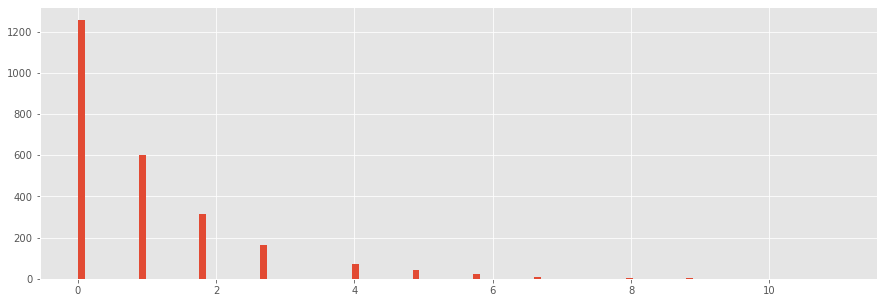

In [4]:
def sample_(N=2500, scale = 0.5):
    for x in range(N):
        je = np.log(random())//np.log(1-scale)#Генерирование случайных чисел по формуле из справочника
    return je
def Geom(n, p=0.5):
    x=[sample_(scale=p) for x in range(n)]
    #print(x)
    return x
plt.hist(Geom(2500,0.5),25, width = 0.1)
plt.show()

## 1.2. Распределение Максвелла <a name="subparagraph2"></a>

### 1.2.1. Описание основных характеристик распределения

Математическое ожидание:
$$M\xi = \int_0^{\infty}x\sqrt{\frac{2}{\pi}}\frac{x^2}{\lambda^3}e^{-\frac{x^2}{2\lambda^2}}dx=\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}\int_0^{\infty}x^3e^{\frac{-x^2}{2\lambda^2}}dx=2\lambda^4\cdot \sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}=2\lambda \sqrt{\frac{2}{\pi}}$$
Дисперсия:
$$D\xi = M(\xi-M\xi)^2=M\xi^2-(M\xi)^2=M(\xi(\xi-1)+\xi)-(M\xi)^2=M(\xi(\xi-1))+M\xi-(M\xi)^2=M(\xi(\xi-1))+M\xi(1-(M\xi))$$
$$M(\xi(\xi-1))=\int_0^{\infty} x^2f(x)dx = \int_0^{\infty} x^2 \sqrt{\frac{2}{\pi}}\frac{x^2}{\lambda^3}e^{-\frac{x^2}{2\lambda^2}}=\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}\int_0^{\infty} x^4 e^{-\frac{x^2}{2\lambda^2}} = \sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3} \cdot 3\lambda^5 \sqrt{\frac{\pi}{2}}=3\lambda^2$$
$$D\xi=M\xi^2-(M\xi)^2=3\lambda^2-4\lambda^2\cdot \frac{2}{\pi}=\frac{3\pi-8}{\pi}\lambda^2$$
Также использовались известные интегралы, который был взят из курса физики:  
$$\int_0^{\infty} x^3 e^{-x^2/2 \lambda^2} dx = \frac {1}{2 (\frac{1}{\lambda^2})^2} \cdot 4 = 2 \lambda^4$$
$$\int_0^{\infty} x^4 e^{-x^2/2 \lambda^2} dx = \frac {3}{8}\sqrt{\pi} (\frac{1}{2\lambda^2})^{-\frac{5}{2}} = 3\lambda^5 \sqrt{\frac{\pi}{2}}$$

Рис.4: График функции распределения


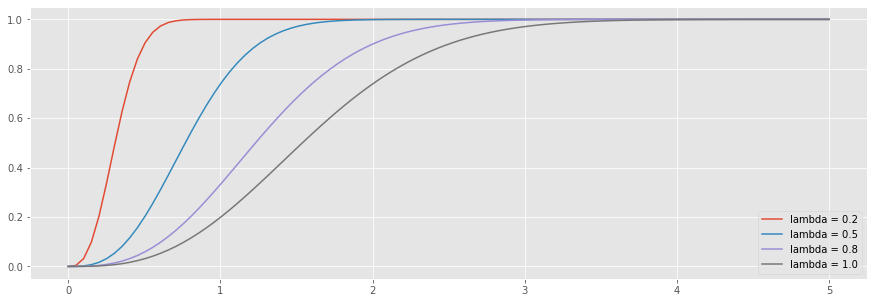

In [5]:
for lambd in [0.2,0.5,0.8,1.0]:
    maxwell_rv = sts.maxwell(scale = lambd)
    x = np.linspace(0,5,100)
    cdf = maxwell_rv.cdf(x)
    plt.plot(x, cdf, label = 'lambda = {}'.format(lambd))
    plt.legend()
print('Рис.4: График функции распределения')



Рис.5: График плотности вероятности распределения


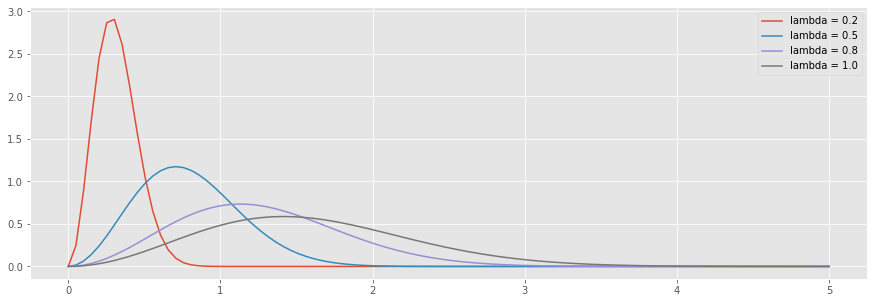

In [6]:
for lambd in [0.2,0.5,0.8,1.0]:
    maxwell_rv = sts.maxwell(scale = lambd)
    x = np.linspace(0,5,100)
    pdf = maxwell_rv.pdf(x)
    k = max(pdf)
    plt.plot(x, pdf, label ='lambda = {}'.format(lambd))
    plt.legend()
print('\n')
print('Рис.5: График плотности вероятности распределения')

Модой абсолютно непрерывного распределения называют любую точку локального максимума плотности распределения.
$f'(x) = \sqrt{\frac{2}{\pi}} \frac{x^2}{\lambda^3} e^{-\frac{x^2}{2\lambda^2}} = \frac{4x}{\lambda^3 \sqrt{2\pi}} e^{-\frac{x^2}{2\lambda^2}} - \frac{2x^2}{\lambda^3 \sqrt{2\pi}} e^{-\frac{x^2}{2\lambda^2}} \frac{x}{\lambda^2} = 0$  
$\frac{4x}{\lambda^3 \sqrt{2\pi}} e^{-\frac{x^2}{2\lambda^2}} = \frac{2x^2}{\lambda^3 \sqrt{2\pi}}e^{-\frac{x^2}{2\lambda^2}} \frac{x}{\lambda^2}$  
$4 = 2x \frac{x}{\lambda^2}$   
$x^2 = 2\lambda^2$  
$x = M_0= \lambda \sqrt{2}$ 

Медиана  
$\int_0^{Me}\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}x^2 e^{-\frac{-x^2}{2\lambda^2}}dx = \frac{1}{2}$  
$\int_0^{Me}x^2 e^{-\frac{-x^2}{2\lambda^2}}dx = \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$(-\lambda^2e^{-\frac{x^2}{2\lambda^2}}x+\lambda^3\sqrt{\frac{\pi}{2}})|_0^{Me} = \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$-Me\lambda^2e^{\frac{-Me^2}{2\lambda^2}}=- \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$Me \cdot e^{\frac{-Me^2}{2\lambda^2}} = \frac{\lambda^2}{2}\sqrt{\frac{\pi}{2}}$  
$Me \approx 1,5383\lambda$

### 1.2.2. Примеры событий, которые могут быть описаны выбранными случайными величинами

Впервые распределение было определено и использовалось для описания скоростей частиц в идеализированных газах, где частицы свободноперемещаются внутри стационарного контейнера, не взаимодействуя друг с другом, за исключением очень коротких столкновений, в которыхони обмениваются энергией и импульсом друг с другом или со своим тепловым окружением. Термин «частица» в этом контексте относится только к газообразным частицам (атомам или молекулам), и предполагается, что система частиц достигла термодинамического равновесия.Энергии таких частиц следуют так называемой статистике Максвелла – Больцмана, а статистическое распределение скоростей выводится путем приравнивания энергии частиц к кинетической энергии.Распределение Максвелла – Больцмана в основном применяется к скоростям частиц в трех измерениях, но оказывается, что оно зависит только от скорости (величины скорости) частиц. Распределение вероятности скорости частицы указывает, какие скорости более вероятны: частица будет иметь скорость, выбранную случайным образом из распределения, и с большей вероятностью будет находиться в одном диапазоне скоростей, чем в другом.  
При тепловом равновесии (T=const) $u_{кв}$ молекул газа остается постоянной и равной $u=\sqrt{\frac{3kT}{m}}$  
Это объясняется тем, что в газе устанавливается стационарное статическое распределение молекул по значениям скоростей, называемое распределением Максвелла:  
$f(u)=\frac{dN(u)}{Ndu}=4\pi(\frac{m}{2\pi kT})^{\frac{3}{2}}\cdot u^2 \cdot e^{-\frac{mu^2}{2kT}}$  
В теории вероятностей рассматривается распределения Максвелла, в котором $x=u$ и $\frac{1}{\lambda^2}=\frac{m}{kT}$  
Нетипичной интерпретацией распределения Максвелла будут данные, которые представляют время ремиссии (в месяцах)  у пациентов с раком мочевого пузыря и первоначально использовались Lee и Wang.  
Ремиссия (лат. remissio «уменьшение, ослабление») — период течения хронической болезни, который проявляется значительным ослаблением (неполная ремиссия) или исчезновением (полная ремиссия) её симптомов (признаков заболевания)

### 1.2.3. Описание способа моделирования выбранных случайных величин

$\textbf{Способ 1:}$
Существует полярный метод (группа полярных методов предназначена для моделирования распределений, так или иначе связанных с двумерными распределениями, инвариантными относительно вращений), где моделируются две независимые случайные величины $\xi_1, \xi_2$ , каждая из которых имеет распределение N(0,1).   
Полярные координаты. Каждая точка $X = (x, y) T ∈ R^2 \backslash \{0\}$ может быть однозначно представлена в виде $X = ||X|| \overline e$, где $\overline e = 1$. Полагая $s = ||X||$ и $\overline e = (\cos t,\sin t)^T , где t \in [0, 2\pi)$, получаем биекцию $\phi : (x, y)^T \rightarrow (s, t)^T$ , действующую из $R^2 \backslash \{0\}$ в $(0,\infty)×[0, 2\pi)$. Конечно, переменные (s, t) являются полярными координатами вектора X, а обратное отображение $\psi : (0, \infty)×[0, 2\pi) \rightarrow R^2 \backslash \{0\}$ имеет вид $x = s \cos t, y = s \sin t$ с якобианом $det \psi' (s, t) = s.$  
Если теперь рассмотреть случайный вектор $\overline \xi \in R^2$ с плотностью распределения $p_\xi(x, y)$ и обозначить r, $\varphi$ (случайные) полярные координаты этого вектора, то, так как в этом случае n = 1, мы
получим из (7.1.1), что 
$$p_{r,\varphi} (s, t) = sp_\xi(s \cos t, s \sin t)1_{(0,\infty)×[0,2\pi)} (s, t).(1.2.3.1)$$ 
Выражение (1.2.3.1) выглядит особенно просто, если существует такая функция $f : (0, \infty) \rightarrow (0, \infty), что p_\xi (x, y) = f(\sqrt{x^2 + y^2}).$ В этом случае, очевидно,
$$p_{r,\varphi}(s, t) = sf(s)I_{(0,\infty)×[0,2\pi)} (s, t) = 2πsf(s)I_{(0,\infty)}(s)\frac{1}{2\pi}I_{[0,2π)}(t).(1.2.3.2)$$
Это значит, что случайные величины r и $\varphi$ независимы, $\varphi ∈ U(0, 2\pi)$, а r имеет плотность распределения $p_r(s) = 2\pi sf(s), s > 0$  
Действительно, поскольку совместная плотность распределения $\xi_1, \xi_2$ имеет вид
$$p(x,y) = \frac{1}{2\pi} e^{-\frac{x^2+y^2}{2}}, x,y \in R,$$
то, как следовательно из вышенаписанного, полярный радиус r и полярный угол $\varphi$ случайного
вектора ($\xi_1, \xi_2$) независимы, причем полярный угол равномерно распределен на $[0, 2π)$, а полярный радиус имеет распределение Рэлея ($p(x) = xe^{\frac{−x^2}{2}}$
, x > 0.).  
Отсюда, применяя моделирующую формулу ($\xi = \sqrt{−2ln(α)}$), сразу же приходим к представлению  
$$\xi_1 = \sqrt{-2ln(\alpha_1)}\cos{(2\pi \alpha_2)},$$
$$\xi_2 = \sqrt{-2ln(\alpha_1)}\sin{(2\pi \alpha_2)},$$
где $\alpha_1, \alpha_2 \in$ U(0, 1)  
В итоге получаем следующий алгоритм:

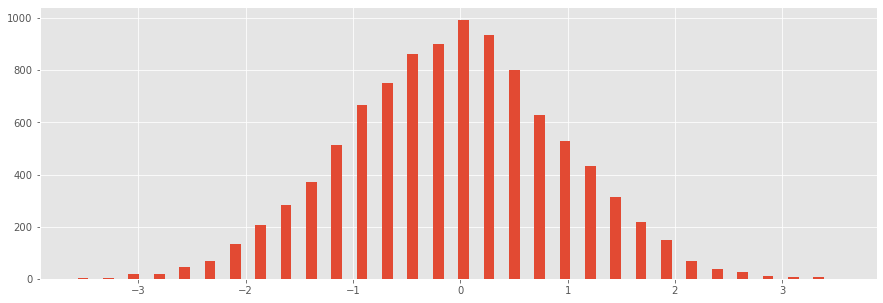

In [7]:
%matplotlib inline
import random
import pandas as pd
import math
from scipy import stats
import sys
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
N=10000
random.seed(123)
epsilon = sys.float_info.epsilon

def box_muller():
    u1, u2 = 0.0, 0.0
    while u1 < epsilon or u2 < epsilon:
        u1 = random.random()
        u2 = random.random()
        
    n1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    n2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return n1, n2

# Use KS to test
samples = [box_muller()[0] for x in range(N)]
test_stat, pvalue = stats.kstest(samples, 'norm', args=(0, 1), N=N)

# Plot our samples against our reference distribution
plt.hist(samples, 30, width = 0.1)
plt.show()

Стоит заметить, что данный способ достаточно быстр.  
Я бы ещё подметил тот факт, что распределение Максвелла с параметром $\lambda = 1$ очень схоже с N(0,1):
$$f(x) = \sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}}x^2  - Максвелла$$
$$f(x) = \sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}}\cdot \frac{1}{2} - N(0,1)$$

$\textbf{Способ 2:}$
По определению, случайный вектор $\overline \xi= (\xi_1, \xi_2 )^T$ равномерно распределен на единичной окружности $S^1$ с центром в нуле, если $\xi_1^2 + \xi_2^2 = 1$ с вероятностью 1 и если полярный угол $\varphi$ вектора $\overline \xi$ равномерно распределен на $[0, 2π).$  
Из этого определения сразу же следует моделирующая формула для равномерного распределения на $S^1$:
$$\xi_1 = \cos (2\pi \alpha)$$
$$\xi_2 = \sin (2\pi \alpha) (1.2.3.3)$$
Вычисление двух тригонометрических функций, однако, может оказаться трудоемкой операцией. Стандартной альтернативой формуле (1.2.3.3) является использование метода отбора для моделирования равномерного распределения в единичном круге $B_1(0) = \{(x, y) : x^2 + y^2 < 1\}$ с центром в нуле с последующей нормировкой результата. Формальное обоснование этой процедуры представим ниже.    
Аналогично полярным координатам на плоскости, каждый ненулевой вектор $X = (x, y, z)^T \in R^3$ может быть однозначно представлен в виде $X = ||X||\overline e$, где 
$$\overline e = (\cos(t) \cos(u), \sin(t) \cos(u), \sin(u))^T, t \in [0, 2\pi), u \in [−\pi/2, \pi/2].$$
Это, конечно, соответствует переходу от евклидовой системы координат (x, y, z) к сферической системе (s, t, u) со сферическим радиусом $s = ||X||$, долготой s и широтой u. Хорошо известно, что якобиан обратного отображения равен $s^2\cos(u)$.  
Поэтому, если случайный вектор $\overline \xi = (\xi_1, \xi_2, \xi_3)^T$ имеет плотность распределения $p_\xi(x, y, z)$, то сферические координаты $r, \varphi, \theta$ этого вектора имеют совместную плотность 
$$p r,\varphi, \theta(s, t, u) = p_\xi(s \cos(t) \cos(u), s \sin(t) \cos(u), s \sin(u)) s^2 \cos(u), (1.2.3.4)$$
сосредоточенную в области $(0, \infty) × [0, 2\pi) × (−\pi/2, \pi/2)$. В случае, когда
$$p_\xi(x, y, z) = f(\sqrt{x^2 + y^2 + z^2}), (1.2.3.5)$$
равенство (1.2.3.4) приобретает вид
$$p_{r,\varphi,\theta} (s, t, u) = 4\pi s^2 f(s^2)I_{(0,\infty)}(s)\frac{1}{2\pi} I_{(0,2\pi)}\frac{\cos(u)}{2}I_{(-\frac{\pi}{2},\frac{\pi}{2})}.$$
Таким образом, случайные величины $r, \varphi$ и $\theta$ оказываются независимыми, причем долгота $\varphi$ равномерно распределена на $(0, 2\pi)$, плотность $p_r(s)$ распределения r равна $4\pi s^2 f(s^2)$, а плотность $p_\theta(u)$ распределения широты $\theta$ сосредоточена на $(−\frac{\pi}{2}, \frac{\pi}{2})$ и равна на этом интервале $0.5 \cos(u)$.  
Например, если $\overline \xi = (\xi^1, \xi^2, \xi^3)^T$ — случайный вектор с независимыми N(0, 1)-распределенными координатами, то его плотность распределения равна $(2\pi)^{−\frac{3}{2}} e^{−\frac{x^2 + y^2 + z^2}{2}}$, и длина $r = ||\overline \xi||$ этого вектора будет иметь плотность распределения $\sqrt{\frac{2}{\pi}}s^2e^{−\frac{s^2}{2}}.$  
Как уже обсуждалось при первом способе моделирования, если случайный вектор $\xi$ имеет распределение (1.2.3.5), то вектор $\nu = \frac{\overline \xi}{||\overline \xi||}$ равномерно распределен на поверхности сферы $\{(x, y, z): x^2 + y^2 + z^2 = 1\}.$ С другой стороны, координаты $\nu_1, \nu_2, \nu_3$ этого вектора выражаются через случайные величины $\varphi$ и $\theta$ как
$$\nu_1 = \cos(\varphi) \cos(\theta), \nu_2 = \sin(\varphi) \cos(\theta), \nu_3 = \sin(\theta). (1.2.3.6)$$
Предложение 1:  
Пусть $\overline \xi \in R^d$ — d-мерный случайный вектор, обладающий распределением $P_\xi$ с плотностью распределения $p_\xi$ , причем $P_\xi(D) = 1$ для некоторого измеримого $D ⊂ R^d$ . Рассмотрим измеримое отображение $\varphi : D \rightarrow R^d$ и предположим, что при $i = 1,... , n$ существуют открытые попарно непересекающиеся подмножества $D_i ⊂ R^d$ , удовлетворяющие следующим условиям.  
1. Множества D и $\cup_{i=1}^n D_i$ совпадают $P_\xi$ -почти всюду.
2. Обозначим $\phi_i = \phi| D_i , \phi(D_i) = \phi_i(D_i) = G_i$ и предположим, что при любом i отображение $\phi_i : D_i \rightarrow G_i$   
   является биекцией с $\psi_i = \phi_i^{−1};$  
   непрерывно дифференцируемо с $det \psi_i' \neq 0 в G_i.$  
Тогда случайный вектор $\overline \eta = \psi(\overline \xi)$ обладает плотностью $p_\eta(Y)$ и  
$$p_\eta(Y) = \sum_{i} p_\xi \phi_i(Y) det \psi_i'(Y)I_{G_i}(Y).$$
Доказательство:  
$$P(\overline \eta \in A) = P(\phi(\overline \xi) \in A) = \sum_i P(\phi(\overline \xi) \in A, \overline \xi \in D_i) = \sum_i P(\phi_i(\overline \xi) \in A \cap G_i, \overline \xi \in D_i) = \sum_i ̄P(\phi_i(\overline \xi) \in A \cap G_i) = \sum_i \int_{\{x: \phi_i(x) \in A \cap G_i\}} p_\xi(X)dX = \sum_i \int_{A \cap G_i} p_\xi(\psi_i(Y))|det \psi_i'(Y)|dY = \int_A \sum_i p_\xi(\psi_i(Y))|det \psi_i'(Y)|I_{G_i}(Y)dY, ч.т.д.$$
Поскольку $\theta$ имеет плотность $p_\theta(u) = \frac{\cos(u)}{2}, |u| \leq \frac{π}{2}$, а функция $\sin(u)$ обратима на этом интервале, то, согласно Предложению 1,
$$p_{\nu_3} (z) = 0.5 \cos(\arcsin(z))|\arcsin'(z) = 0.5 \cos(\arcsin(z))\frac{1}{\cos(\arcsin(z))} = 0.5$$
при |z| < 1. Таким образом, $\nu_3 \in$ U(−1, 1). Конечно, такое же распределение имеет и скалярное произведение $\nu_t = \overline \nu^T \overline t$ для любого детерминированного вектора $\overline t$ единичной длины.  
Запишем соответствующий алгоритм.

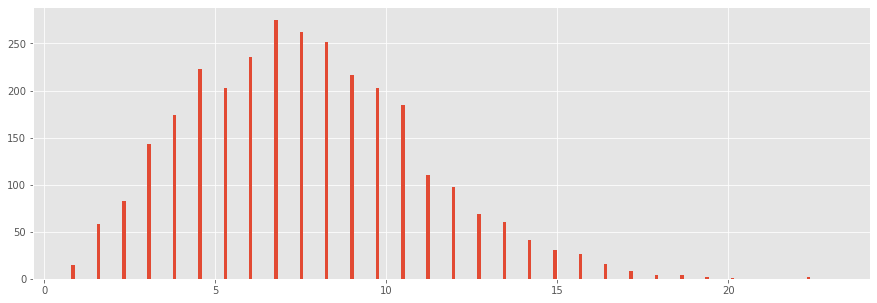

In [8]:
def Maxwell(n,lambd = 1):
    x = [sample_(scale = lambd) for x in range(n)]
    y=[sample_(scale = lambd) for x in range(n)]
    z=[sample_(scale = lambd) for x in range(n)]
    l = []
    #print(x)
    for i in range(n):
        l.append(np.sqrt(x[i]**2+y[i]**2+z[i]**2))
    return l
# Our sample function of N(0,1) using Equation (2)
def sample_(N = 3000,scale = 1):
    return scale*2.0*np.sqrt(N)*(sum(randint(0,1)for x in range(N))/N-0.5)
plt.hist(Maxwell(3000,5),30, width = 0.1)
plt.show()

# 2 Домашнее задание. Основные понятия математической статистики <a name="paragraph2"></a>

## 2.1 Геометрическое распределение <a name="subparagraph3"></a>

### 2.1.1 Моделирование выбранных случайных величин

In [25]:
# Создание случайной величины с геометрическим распределением, зависящим
# от параметра p
p = 0.5
geom_rv = sts.geom(p)

In [26]:
#Генерация выборки объема n = 5 с выводом
for n in [5]:
    means_5 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_5.append(sample)
        print(sample)

[1 5 2 1 3]
[1 1 2 6 1]
[2 1 4 2 5]
[3 1 1 1 1]
[3 2 3 1 4]


In [27]:
#Генерация выборки объема n = 10 с выводом
for n in [10]:
    means_10 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_10.append(sample)
        print(sample)

[1 1 1 1 3 2 5 5 1 2]
[4 1 3 3 3 3 1 2 3 1]
[4 2 3 1 2 2 2 1 1 2]
[1 1 2 1 3 1 2 2 1 3]
[3 2 5 6 3 2 2 1 1 2]


In [28]:
#Генерация выборки объема n = 100 ,без вывода
for n in [100]:
    means_100 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_100.append(sample)

In [29]:
#Генерация выборки объема n = 1000 ,без вывода
for n in [1000]:
    means_1000 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_1000.append(sample)

In [30]:
#Генерация выборки объема n = 100000 ,без вывода
for n in [100000]:
    means_100000 = []
    for i in range(5):
        sample = geom_rv.rvs(n)
        means_100000.append(sample)

### 2.1.2 Построение эмпирической функции распределения

In [31]:
#n=5
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    print('Empirical distribution function F5(x) for sample',a+1,':')
    for i in range(4):
        if(i==0):
            n=0.
            g=1
            print(n,', x <=',b[i])
        if(b[i+1]==b[i]):
            g+=1
        else:
            n=round(n+0.2*g,1)
            g=1
            print(n,',',b[i],'< x <=',b[i+1])
        if(i==3):
            n=1.
            print(n,', x >',b[i+1])

Empirical distribution function F5(x) for sample 1 :
0.0 , x <= 1
0.4 , 1 < x <= 2
0.6 , 2 < x <= 3
0.8 , 3 < x <= 5
1.0 , x > 5
Empirical distribution function F5(x) for sample 2 :
0.0 , x <= 1
0.6 , 1 < x <= 2
0.8 , 2 < x <= 6
1.0 , x > 6
Empirical distribution function F5(x) for sample 3 :
0.0 , x <= 1
0.2 , 1 < x <= 2
0.6 , 2 < x <= 4
0.8 , 4 < x <= 5
1.0 , x > 5
Empirical distribution function F5(x) for sample 4 :
0.0 , x <= 1
0.8 , 1 < x <= 3
1.0 , x > 3
Empirical distribution function F5(x) for sample 5 :
0.0 , x <= 1
0.2 , 1 < x <= 2
0.4 , 2 < x <= 3
0.8 , 3 < x <= 4
1.0 , x > 4


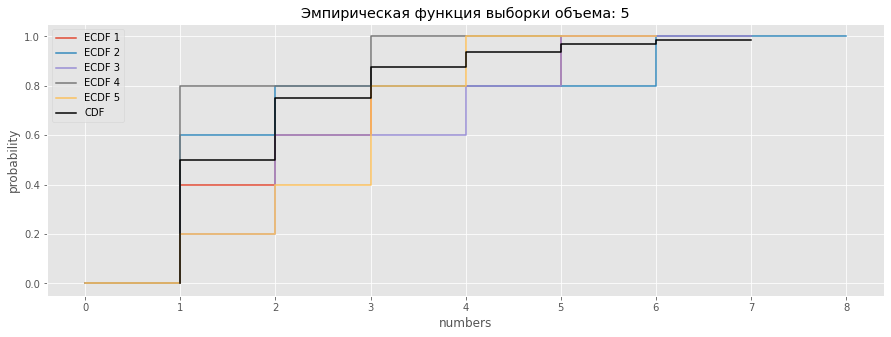

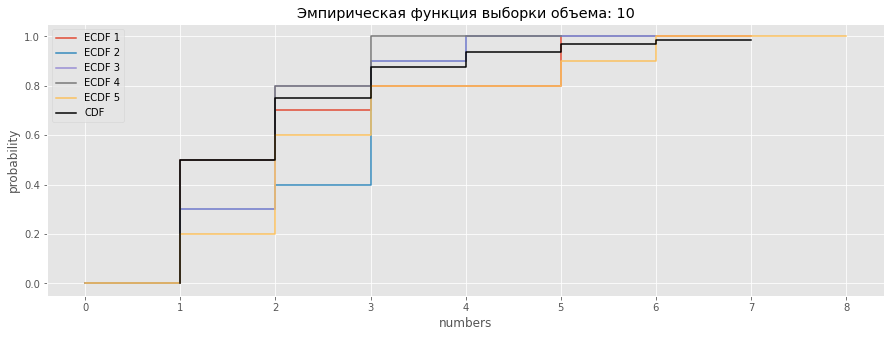

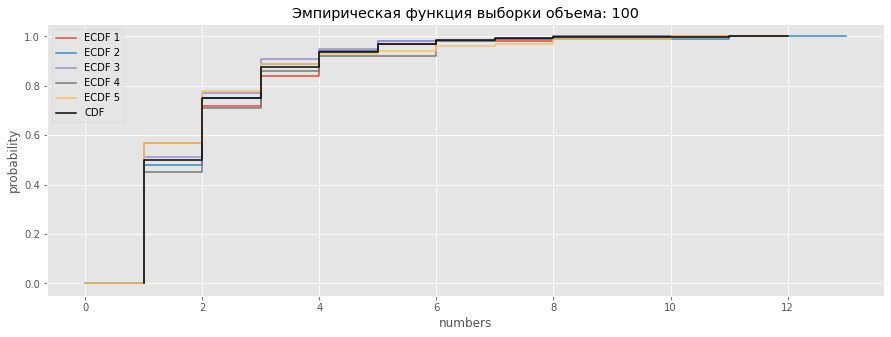

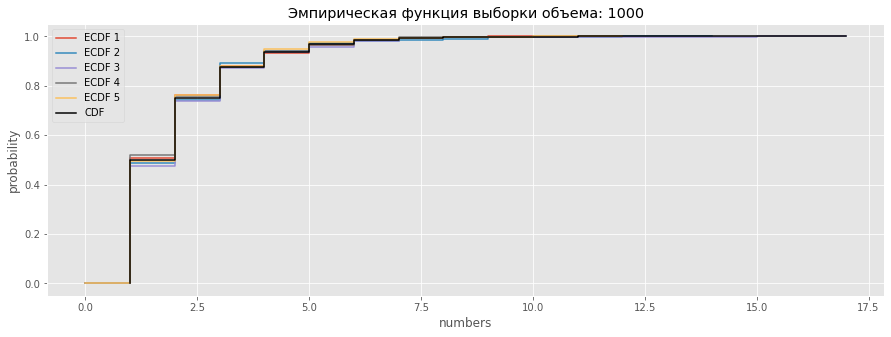

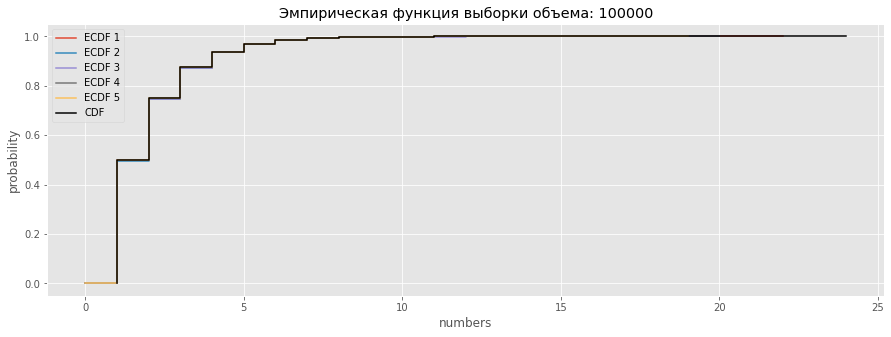

In [32]:
#n=5
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x1=[]
        y1=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x1.append(i)
        y1.append(t/v)
        x1.append(i+1)
        y1.append(t/v)
    x1.append(b[v-1])
    y1.append(1)
    x1.append(b[v-1]+2)
    y1.append(1)
    plt.plot(x1,y1,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(1,8,1)#Построение
plt.step(n,1-(1-p)**(n-1),'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=10
for a in range(5):
    b=means_10[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x2=[]
        y2=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x2.append(i)
        y2.append(t/v)
        x2.append(i+1)
        y2.append(t/v)
    x2.append(b[v-1])
    y2.append(1)
    x2.append(b[v-1]+2)
    y2.append(1)
    plt.plot(x2,y2,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(1,8,1)#Построение
plt.step(n,1-(1-p)**(n-1),'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=100
for a in range(5):
    b=means_100[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x3=[]
        y3=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x3.append(i)
        y3.append(t/v)
        x3.append(i+1)
        y3.append(t/v)
    x3.append(b[v-1])
    y3.append(1)
    x3.append(b[v-1]+2)
    y3.append(1)
    plt.plot(x3,y3,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(1,13,1)#Построение
plt.step(n,1-(1-p)**(n-1),'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=1000
for a in range(5):
    b=means_1000[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x4=[]
        y4=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x4.append(i)
        y4.append(t/v)
        x4.append(i+1)
        y4.append(t/v)
    x4.append(b[v-1])
    y4.append(1)
    x4.append(b[v-1]+2)
    y4.append(1)
    plt.plot(x4,y4,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(1,18,1)#Построение
plt.step(n,1-(1-p)**(n-1), 'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=100000
for a in range(5):
    b=means_100000[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range(b[v-1]):
        N.append(b.count(i))
        x5=[]
        y5=[]
        t=0
    for i in range(b[v-1]):
        t+=N[i]
        x5.append(i)
        y5.append(t/v)
        x5.append(i+1)
        y5.append(t/v)
    x5.append(b[v-1])
    y5.append(1)
    x5.append(b[v-1]+2)
    y5.append(1)
    plt.plot(x5,y5,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
n=np.arange(1,25,1)#Построение
plt.step(n,1-(1-p)**(n-1), 'k-', label='CDF')#теоретическойфункции
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")

Пусть $X = (X_1,...,X_n)$- выборка из дискретного распределения $\sigma(\xi)$ Величина скачка в точке j есть
$$\Delta \hat F_n(j)= \hat F_n(j) - \hat F_n(j-0)=\frac{\nu}{n},$$
$j=1,...,N$  
Здесь $P\{\Delta \dot F_n(j)=0\}=P(\nu_j=0)=(1-p_j)^n$ что мало при больших n, т.е. в большой выборке скачок в точке j наверняка будет иметь место. Более того, так как
$P\{\cup_{j=1}^{N} \{\Delta \hat F_n(j)=0\}\} \leq \sum_{j=1}^{N} (1-p_j)^n \rightarrow 0,$
при $n \rightarrow \infty$ , то в больших выборках с вероятностью, близкой к 1, скачки э.ф.р. $F_n(x)$ будут иметь место во всех точках 1,2,...,N, а случайными будут лишь величины этих скачков.  
Если же теоретическая функция распределения $F_\xi = F(x)$ непрерывна, то с вероятностью 1 все элементы выборки $X = (X_1, ..., X_n)$ будут различны, и случайными теперь будут точки скачков, величины же скачков неслучайны и равны $\frac{1}{n}$  
Таким образом, для выборок из дискретных и непрерывных распределений характер соответствующих эмпирических функций распределениябудет различным, что можно заметить на получившихся графиков для дискретного и непрерывного распределения. Тем не менее в любомслучае э.ф.р. $\hat F_n(x)$ с увеличением объема выборки n сближается в каждой точке х с теоретической функцией распределения F(x).  
Максимальная точная верхняя граница разности пары эмпирических функций распределения - наибольшая разность между значениями вероятности двух функций в одной точке.  

Верхняя граница разности э.ф.р. выборок размера n = 5 : 0.600  
Верхняя граница разности э.ф.р. выборок размера n = 10 : 0.400  
Верхняя граница разности э.ф.р. выборок размера n = 100 : 0.17   
Верхняя граница разности э.ф.р. выборок размера n = 1000 : 0.061  
Верхняя граница разности э.ф.р. выборок размера n = 100000 : 0.0049  
С увеличением объема выборки верхняя граница разности уменьшается, что очевидно.

### 2.1.3 Построение вариационного ряда выборки

Определение:  
Пусть  $X = (X_1,...,X_n)$- выборка из некоторого распределения $\sigma(\xi)$  
Произвольной реализации $x = (x_1, ..., x_n)$ этой выборки можно поставить в соответствие упорядоченную последовательность  
$$x_{(1)} \leq x_{(2)} \leq ... \leq x_{(n)}$$
располагая $x_1, ..., x_n$ в порядке их возрастания, так что $x_{(1)} = min \{x_1, ..., x_n\}, x_{(2)}$ - второе по величине значение, $x_{(n)} = max\{x_1,...,x_n \}$  
Обозначим через $X_{(k)}$ случайную величину, которая для каждой реализации выборки Х принимает значение $x_{(k)}, k = 1,...,n$. Так по выборке Х определяют новую последовательность случайных величин $X_{(1)},..., X_{(n)}$, называемых $\textit{порядковыми статистиками}$ выборки. Из определения порядковых статистик следует, что они упорядочены по возрастанию их значений, т.е. они образуют возрастающую последовательность  
$$X_{(1)} \leq X_{(2)} \leq ... \leq X_{(n)},$$
которая называется $\textit{вариационным рядом}$ выборки Х.

In [33]:
#Вариационный ряд для выборки объема n=5 с выводом
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    print(b)

[1, 1, 2, 3, 5]
[1, 1, 1, 2, 6]
[1, 2, 2, 4, 5]
[1, 1, 1, 1, 3]
[1, 2, 3, 3, 4]


In [34]:
#Вариационный ряд для выборки объема n=10 с выводом
for a in range(5):
    b=means_10[a]
    b=sorted(b)
    print(b)

[1, 1, 1, 1, 1, 2, 2, 3, 5, 5]
[1, 1, 1, 2, 3, 3, 3, 3, 3, 4]
[1, 1, 1, 2, 2, 2, 2, 2, 3, 4]
[1, 1, 1, 1, 1, 2, 2, 2, 3, 3]
[1, 1, 2, 2, 2, 2, 3, 3, 5, 6]


In [35]:
#Вариационный ряд для выборки объема n=100 без вывода
for a in range(5):
    b=means_100[a]
    b=sorted(b)

In [36]:
#Вариационный ряд для выборки объема n=1000 без вывода
for a in range(5):
    b=means_1000[a]
    b=sorted(b)

In [37]:
#Вариационный ряд для выборки объема n=100000 без вывода
for a in range(5):
    b=means_100000[a]
    b=sorted(b)

Определение:   
$\alpha$- квантиль случайной величины $\xi$ с функцией распределения $F(x) = P\{\xi < x\}$ — это любое число $x_\alpha$, удовлетворяющее двум условиям:  
$1) F(x_\alpha) \leq \alpha$ $2)F(x_\alpha+0) \geq \alpha.$  
Исходя из того, что при больших выборках э.ф.р. стремится к теоритической функции распределения, эмпирические квантили так же стремятся к теоритическим по определению.  
Пусть F(x) - функция распределения. Тогда квантильная функция:  
$F^{-1}(r) = min\{x \in N_+ : F(x) \geq r\} for r \in (0;1)$  
$F^{-1}(r) = [\frac{ln(1-r)}{ln(1-p}]$

In [38]:
k = 1
for b in [means_5[a], means_10[a],means_100[a],means_1000[a],means_100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b, 0.1))
    k += 1

n = 5
1.4
n = 10
1.0
n = 100
1.0
n = 1000
1.0
n = 100000
1.0


In [39]:
#Сравнение
np.log(1-0.1)//np.log(1-p)

0.0

In [40]:
k = 1
for b in [means_5[a], means_10[a],means_100[a],means_1000[a],means_100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b, 0.5))
    k += 1

n = 5
3.0
n = 10
2.0
n = 100
1.0
n = 1000
2.0
n = 100000
1.0


In [41]:
#Сравнение
geom.median(p)

1.0

In [42]:
#Сравнение
np.log(1-0.5)//np.log(1-p)

1.0

In [43]:
k = 1
for b in [means_5[a], means_10[a],means_100[a],means_1000[a],means_100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b, 0.7))
    k += 1

n = 5
3.0
n = 10
3.0
n = 100
2.0
n = 1000
2.0
n = 100000
2.0


In [44]:
#Сравнение
np.log(1-0.7)//np.log(1-p)

1.0

### 2.1.4 Построение гистограммы и полигона частот

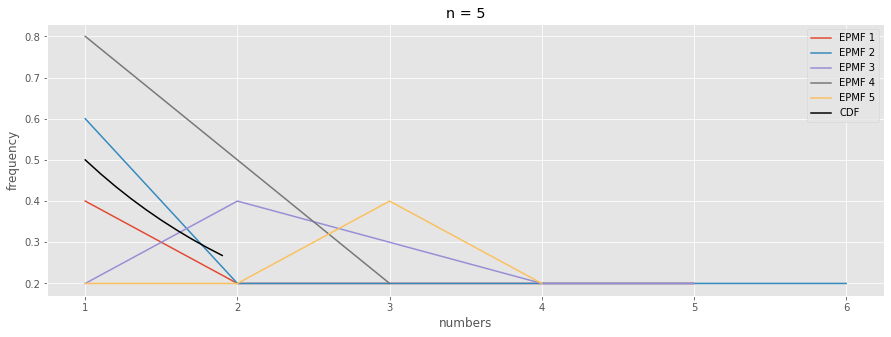

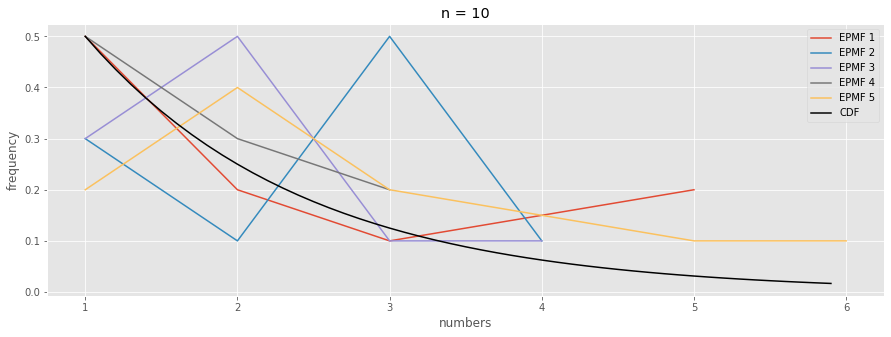

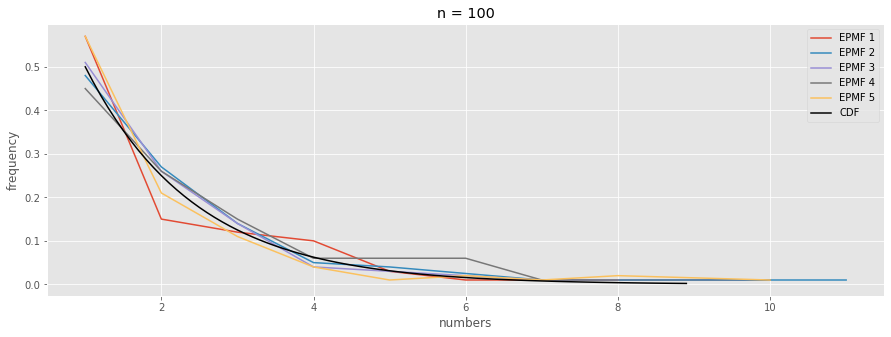

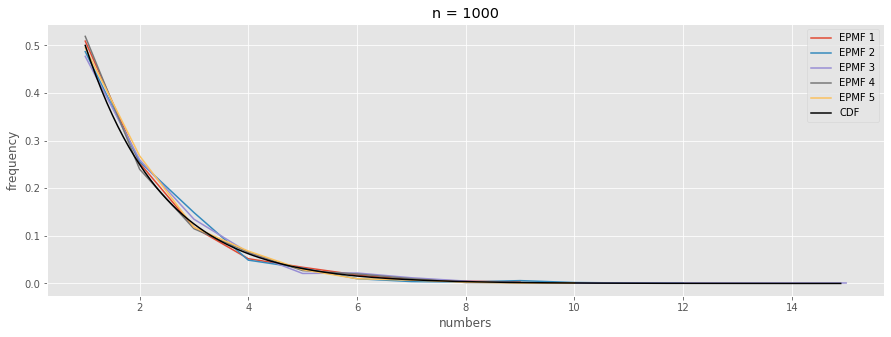

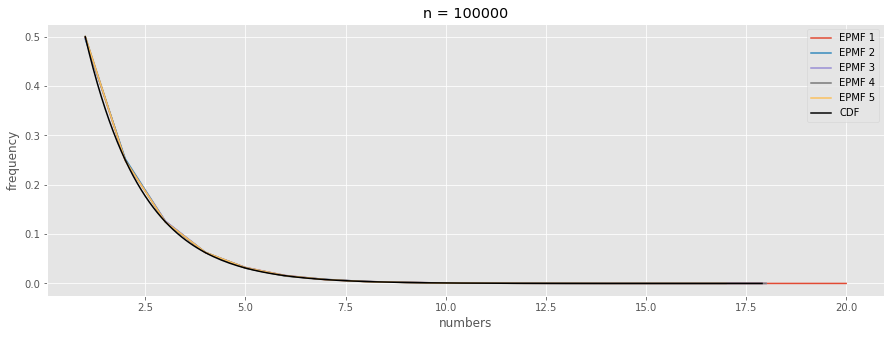

In [47]:
#n=5
for a in range(5):
    b=means_5[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/5.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 5")
n=np.arange(1,2,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    b=means_10[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/10.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 10")
n=np.arange(1,6,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    b=means_100[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/100.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 100")
n=np.arange(1,9,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    b=means_1000[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/1000.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 1000")
n=np.arange(1,15,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100000
for a in range(5):
    b=means_100000[a]
    b=sorted(b)
    x=[]
    y=[]
    c=Counter(b)
    for i in c:
        x.append(i)
        y.append(b.count(i)/100000.0)
    plt.plot(x,y,label="EPMF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("n = 100000")
n=np.arange(1,18,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

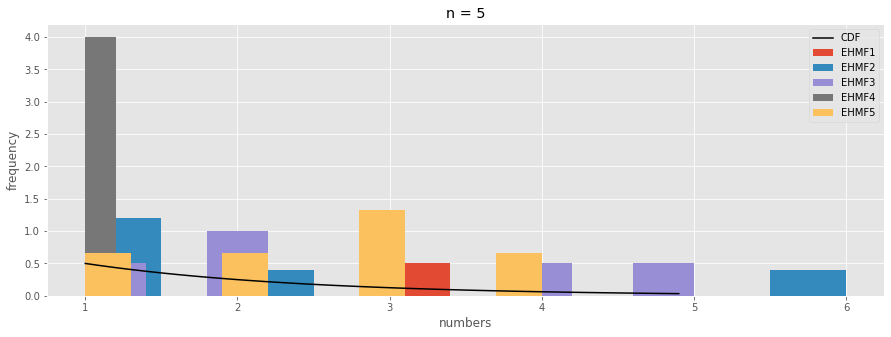

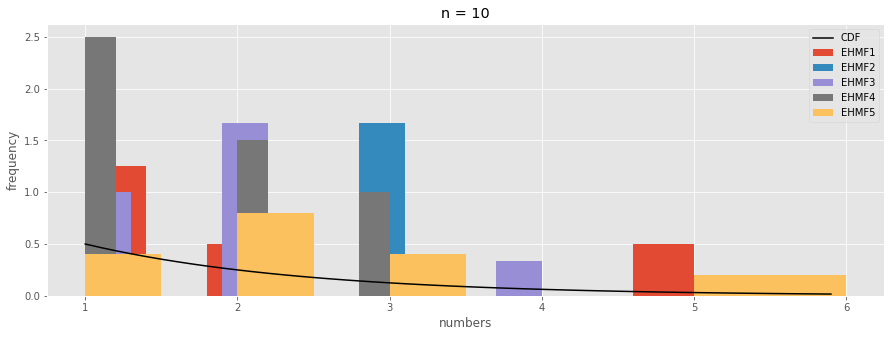

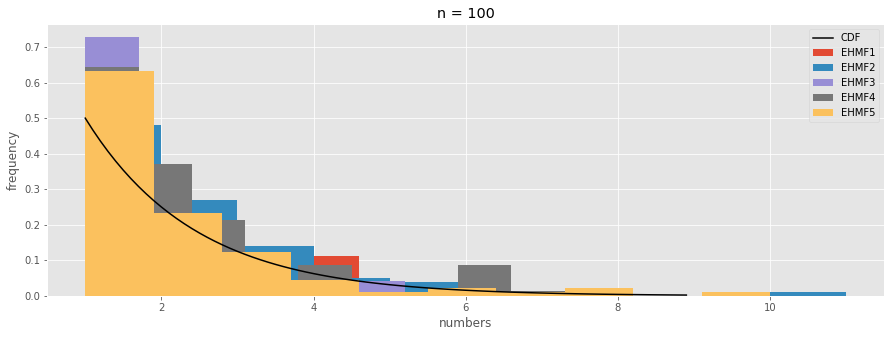

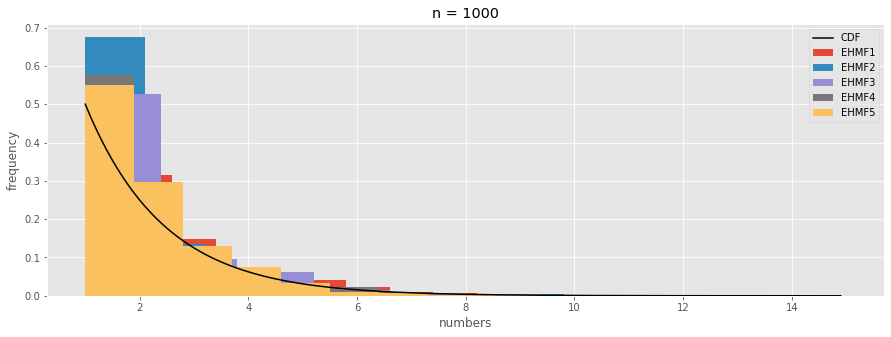

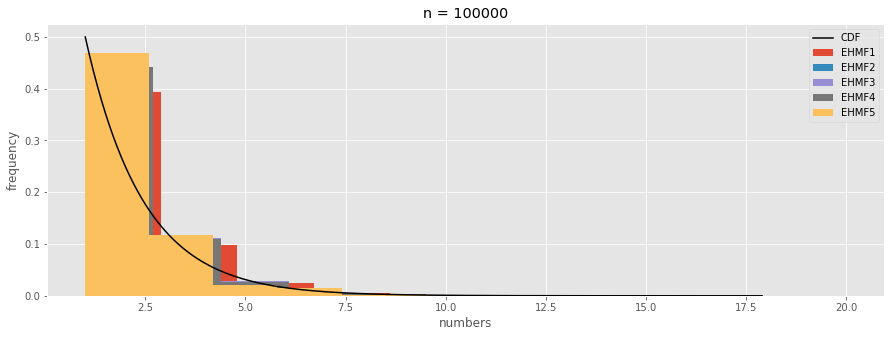

In [48]:
#n=5
for a in range(5):
    plt.hist(means_5[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(1,5,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 5")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    plt.hist(means_10[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(1,6,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 10")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    plt.hist(means_100[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(1,9,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 100")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    plt.hist(means_1000[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(1,15,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 1000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100000
for a in range(5):
    plt.hist(means_100000[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
n=np.arange(1,18,0.1)#Построение
plt.plot(n,p*(1-p)**(n-1),'k-',label='CDF')#функции вероятности
plt.legend()#распределения
plt.title("n = 100000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

Если наблюдаемая в эксперименте случайная величина $\xi$ дискретна и принимает значения $a_1,a_2,..$, то более наглядное представление о ее законе распределения дадут относительные частоты $\nu_r^* = \frac{\nu_r}{n}$, где $\nu_r$ - число элементов выборки $X = (X_1,...,X_n)$, принявших значение $a_r: \nu_r = \sum_{j=1}^{n}I(X_j = a_r), r = 1,2,..$, т.е. $\nu_r^*$ сближается с ростом n с теоретической вероятностью $P\{\xi = a_r\}$, и потому, по крайней мере для больших выборок, относительные частоты $\nu_r^*$ можно рассматривать в качестве приближенных значений (оценок) для неизвестных вероятностей $P\{\xi = a_r\}$.  
Наглядным представлением данных является полигон частот, который представляет собой ломаную с вершинами в точках $(a_r;\nu_r), r = 1,2,...$  
Можно рассматривать также статистический ряд {{($a_r; \nu_r$)}}.  
На графиках выше наглядно подтверждаются наши теоретические знания.

## 2.2 Распределение Максвелла <a name="subparagraph4"></a>

### 2.2.1 Моделирование выбранных случайных величин

In [49]:
# Создание случайной величины с распределением Максвелла, зависящим
# от параметра lambda
lambd=1.0
maxwell_rv=sts.maxwell(scale=lambd)

In [50]:
#Генерация выборки объема n = 5 с выводом
for n in[5]:
    means__5=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__5.append(sample)
        print(sample)

[1.22824737 2.25282076 1.26966936 1.89754893 2.92890313]
[1.66552915 0.38991725 1.63259676 0.54522796 1.24573642]
[1.37293193 1.11799582 1.77877468 1.13429626 0.84539817]
[0.82361018 0.97177789 1.34343198 0.76674619 0.64720576]
[2.81660646 1.23244456 1.50593536 1.68529716 1.331298  ]


In [51]:
#Генерация выборки объема n = 10 с выводом
for n in[10]:
    means__10=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__10.append(sample)
        print(sample)

[1.59018855 1.93298257 1.27392015 0.54546963 1.88469524 0.90775018
 2.15988237 1.7361604  1.59096987 2.1507129 ]
[1.22568466 2.2162969  1.26654881 1.66038105 2.72535625 2.05169812
 1.66507211 1.27201409 1.75745277 1.43867041]
[1.66607258 1.76942726 0.58653011 0.90276047 1.84034521 2.94878049
 1.18226513 1.64741695 0.84552366 2.63949101]
[1.55906231 1.67077838 2.96434502 0.94532347 1.05086345 0.47900353
 2.16064792 2.64056113 2.86821294 1.54390957]
[1.52265259 1.24470805 1.2113844  2.14117398 1.19480553 1.64380941
 1.38423145 1.89778476 2.48487473 0.4994464 ]


In [52]:
#Генерация выборки объема n = 100 без вывода
for n in[100]:
    means__100=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100.append(sample)

In [53]:
#Генерация выборки объема n = 1000 без вывода
for n in[1000]:
    means__1000=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__1000.append(sample)

In [54]:
#Генерация выборки объема n = 100000 без вывода
for n in[100000]:
    means__100000=[]
    for i in range(5):
        sample=maxwell_rv.rvs(n)
        means__100000.append(sample)

In [55]:
#Вернёмся к медиане и убедимся, что в пункте 1.2.1 она была найдена верно
maxwell.median()

1.5381722544550522

### 2.2.2 Построение эмпирической функции распределения

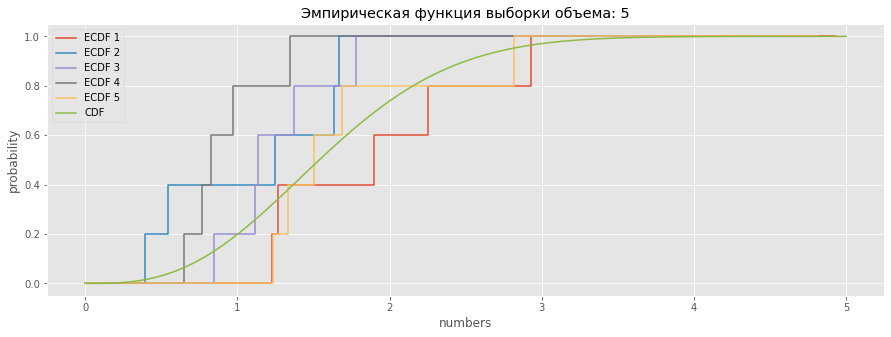

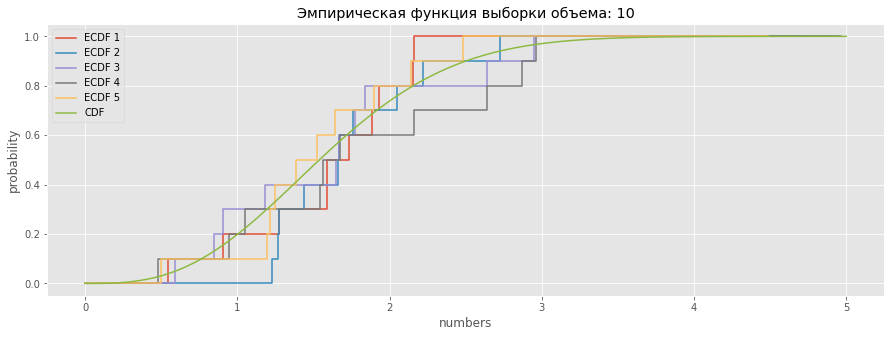

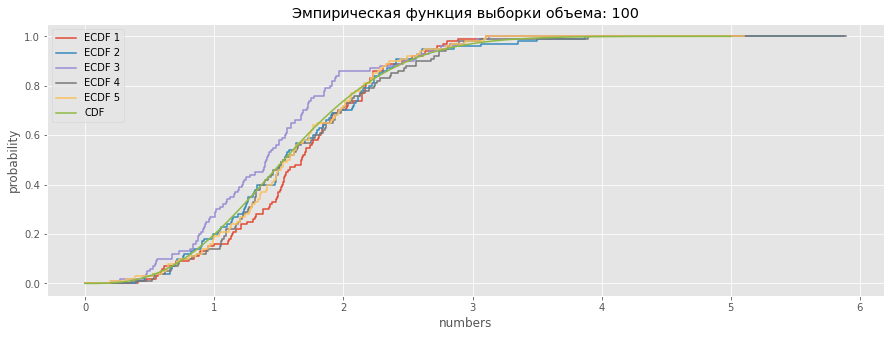

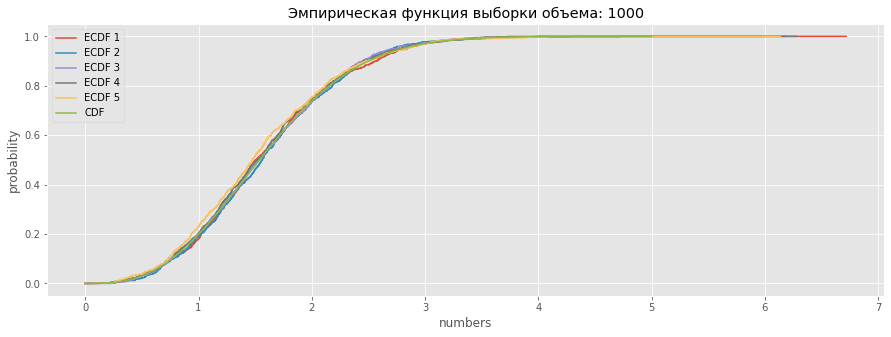

In [56]:
#n=5
for a in range(5):
    b=means__5[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоретической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=10
for a in range(5):
    b = means__10[a]
    b = sorted(b)
    v = len(b)
    N = []
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоретической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=100
for a in range(5):
    b=means__100[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоретической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")
#n=1000
for a in range(5):
    b=means__1000[a]
    b=sorted(b)
    v=len(b)
    N=[]
    for i in range((v-1)):
        N.append(b.count(b[i]))
        x=[]
        y=[]
        t=0
        x.append(0.0)
        y.append(0.0)
        x.append(b[0])
        y.append(0.0)
    for i in range((v-1)):
        t+=N[i]
        x.append(b[i])
        y.append(float(t/v))
        x.append(b[i+1])
        y.append(float(t/v))
    x.append(b[v-1])
    y.append(1)
    x.append(b[v-1]+2)
    y.append(1)
    plt.plot(x,y,label="ECDF "+str(a+1))
    plt.legend(loc='lower right')
plt.title("Эмпирическая функция выборки объема: "+str(v))
x=np.linspace(0,5,100)#Построение
cdf=maxwell_rv.cdf(x)#теоритической функции
plt.plot(x,cdf,label='CDF')#распределения
plt.legend()
plt.xlabel("numbers")
plt.ylabel("probability")
plt.show()
print("\n")

### 2.2.3 Построение вариационного ряда выборки

In [57]:
#Вариационный ряд для выборки объема n=5 с выводом
for a in range(5):
    b=means__5[a]
    b=sorted(b)
    print(b)

[1.2282473675697252, 1.2696693567052326, 1.8975489267374153, 2.2528207558178623, 2.928903130128443]
[0.38991725453053305, 0.5452279551688076, 1.2457364208076085, 1.6325967597338709, 1.6655291541999269]
[0.8453981658590459, 1.1179958176172287, 1.1342962574492497, 1.372931926001838, 1.778774681631404]
[0.6472057630561947, 0.7667461923945431, 0.8236101808690581, 0.971777893349625, 1.343431978470501]
[1.2324445638385821, 1.3312979996226695, 1.5059353635900166, 1.6852971646855783, 2.8166064646117785]


In [58]:
#Вариационный ряд для выборки объема n=10 с выводом
for a in range(5):
    b=means__10[a]
    b=sorted(b)
    print(b)

[0.545469632363455, 0.9077501848414314, 1.2739201532235063, 1.5901885453670208, 1.5909698721134873, 1.7361604037623226, 1.8846952408421465, 1.932982565338934, 2.1507128989171025, 2.159882374977763]
[1.225684662774647, 1.266548805803786, 1.272014087717992, 1.4386704093865395, 1.6603810450258205, 1.6650721060167246, 1.7574527686710586, 2.051698119254962, 2.2162969036346123, 2.7253562497462114]
[0.5865301070941781, 0.8455236579523557, 0.902760474895872, 1.1822651283102814, 1.6474169521989097, 1.6660725752383378, 1.7694272563777227, 1.8403452140518992, 2.6394910085698595, 2.948780487588671]
[0.4790035311939791, 0.9453234678647062, 1.0508634452789742, 1.5439095650590173, 1.5590623087762776, 1.6707783808711532, 2.160647919604488, 2.6405611335332497, 2.868212942141064, 2.964345015808026]
[0.4994463974658241, 1.1948055342182893, 1.2113843957872759, 1.2447080508391726, 1.3842314474099913, 1.5226525940064555, 1.6438094058200987, 1.8977847613870693, 2.1411739780937475, 2.484874725956961]


In [59]:
#Вариационный ряд для выборки объема n=100 без вывода
for a in range(5):
    b=means__100[a]
    b=sorted(b)

In [60]:
#Вариационный ряд для выборки объема n=1000 без вывода
for a in range(5):
    b=means__1000[a]
    b=sorted(b)

In [61]:
#Вариационный ряд для выборки объема n=100000 без вывода
for a in range(5):
    b=means__100000[a]
    b=sorted(b)

Возникли сложности при вычислении теоретических значений квантилей, однако был найден справочник:"Справочник по вероятностным распределениям" Р.Н.Вадзинский. В нём была найдена таблица для приближенного решения уравнения $x_\alpha = \lambda m_\alpha$, где $x_\alpha = \lambda m_\alpha$ - квантиль порядка $\alpha$ распределения Максвелла

In [62]:
k=1
for b in [means__5[a],means__10[a],means__100[a],means__1000[a],means__100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b,0.1))
    k+=1

n = 5
1.2719859381522172
n = 10
1.1252696205430428
n = 100
0.7938084172369115
n = 1000
0.7374170981472817
n = 100000
0.7603097895100107


Сравнение со значением (с теоретическим) из таблицы:  
$\alpha \approx 0.76$

In [63]:
k=1
for b in [means__5[a],means__10[a],means__100[a],means__1000[a],means__100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b,0.5))
    k+=1

n = 5
1.5059353635900166
n = 10
1.4534420207082235
n = 100
1.574535047585379
n = 1000
1.4765126474373647
n = 100000
1.537607751024725


In [64]:
#Сравнение
maxwell.median()

1.5381722544550522

In [65]:
k=1
for b in [means__5[a],means__10[a],means__100[a],means__1000[a],means__100000[a]]:
    if(k==1):
        print('n = 5')
    if(k==2):
        print('n = 10')
    if(k==3):
        print('n = 100')
    if(k==4):
        print('n = 1000')
    if(k==5):
        print('n = 100000')
    print(np.quantile(b,0.7))
    k+=1

n = 5
1.649424804466466
n = 10
1.7200020124901898
n = 100
1.9686707573406326
n = 1000
1.8574082725897791
n = 100000
1.9163671862147416


Сравнение со значением (с теоретическим) из таблицы:  
$\alpha \approx 1.92$

С увеличением объема выборки э.ф.р. стремится к теоритической функции распределения, следовательно, эмпирические квантили так жестремятся к теоритическим по определению. Что и можно наблюдать выше.

### 2.2.4 Построение гистограммы и полигона частот

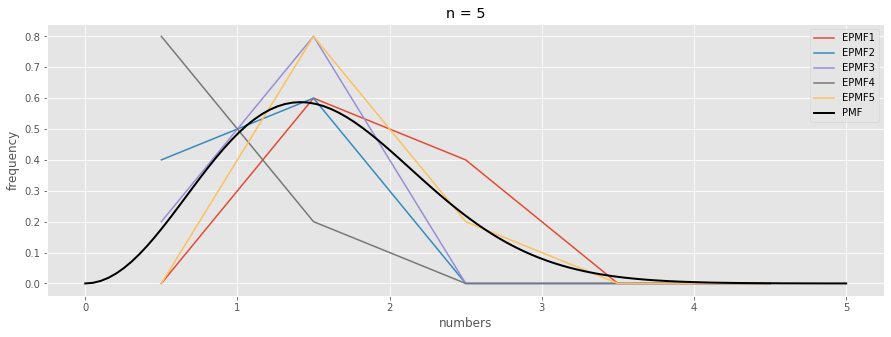

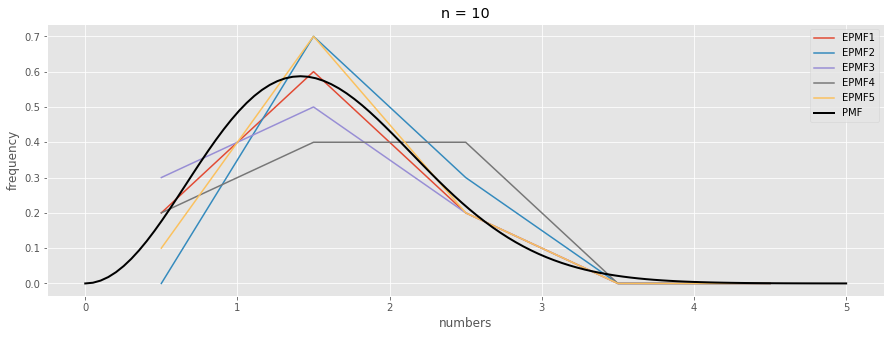

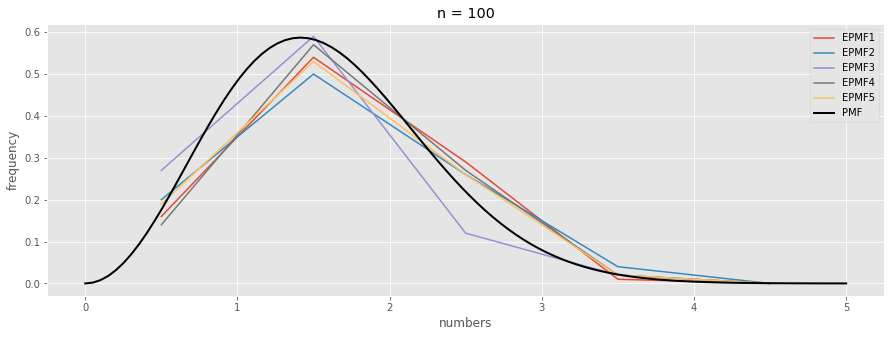

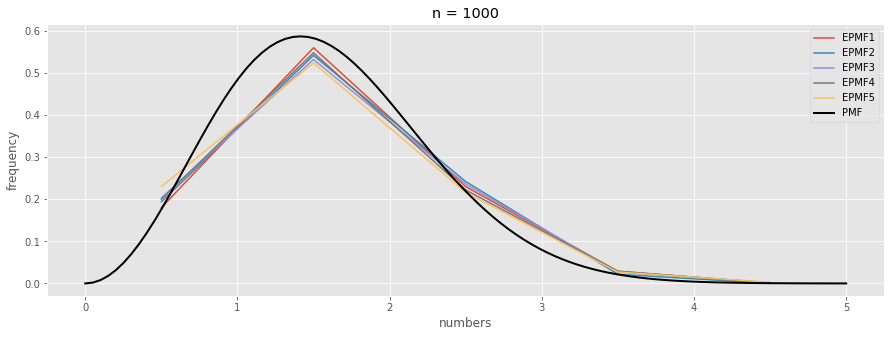

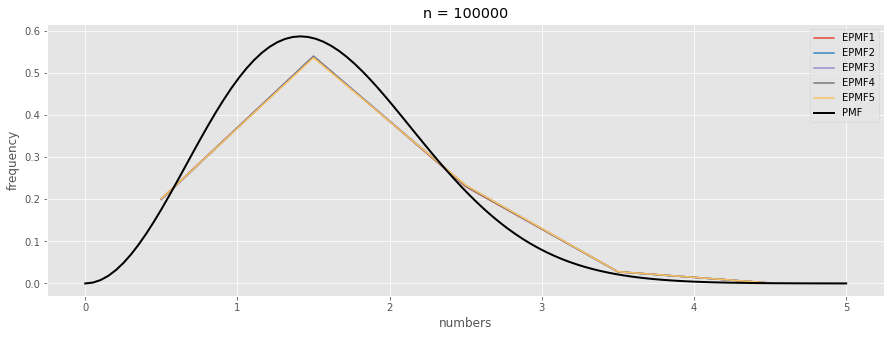

In [66]:
#n=5
for a in range(5):
    b=means__5[a]
    mas=list(range(1,6))
    p=[0,0,0,0,0]
    for i in range(5):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/5.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 5")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    b=means__10[a]
    mas=list(range(1,11))
    p=[0,0,0,0,0]
    for i in range(10):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/10.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 10")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    b=means__100[a]
    mas=list(range(1,101))
    p=[0,0,0,0,0]
    for i in range(100):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/100.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 100")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    b=means__1000[a]
    mas=list(range(1,1001))
    p=[0,0,0,0,0]
    for i in range(1000):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/1000.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 1000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100000
for a in range(5):
    b=means__100000[a]
    mas=list(range(1,100001))
    p=[0,0,0,0,0]
    for i in range(100000):
        mas[i]=b[i]
        if mas[i]>0 and mas[i]<1:
            p[0]=p[0]+1
        if mas[i]>1 and mas[i]<2:
            p[1]=p[1]+1
        if mas[i]>2 and mas[i]<3:
            p[2]=p[2]+1
        if mas[i]>3 and mas[i]<4:
            p[3]=p[3]+1 
        if mas[i]>4 and mas[i]<5:
            p[4]=p[4]+1
    print()
    dob=[]
    bod=[]
    keks=0.5
    for i in range(5):
        dob.append(keks)
        bod.append(p[i]/100000.0)
        keks+=1
    plt.plot(dob,bod,label='EPMF'+str(a+1))
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 100000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

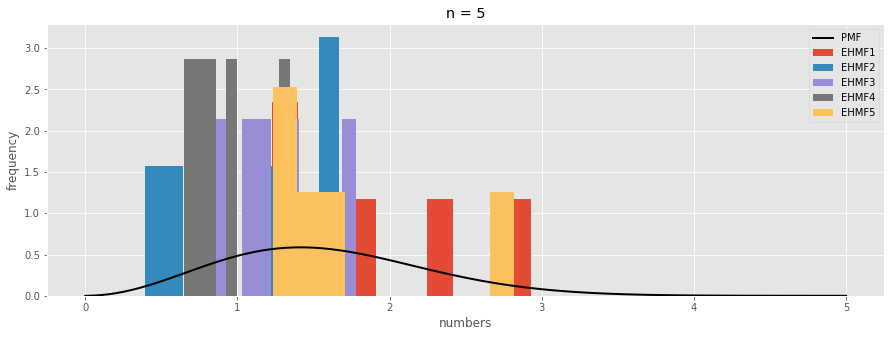

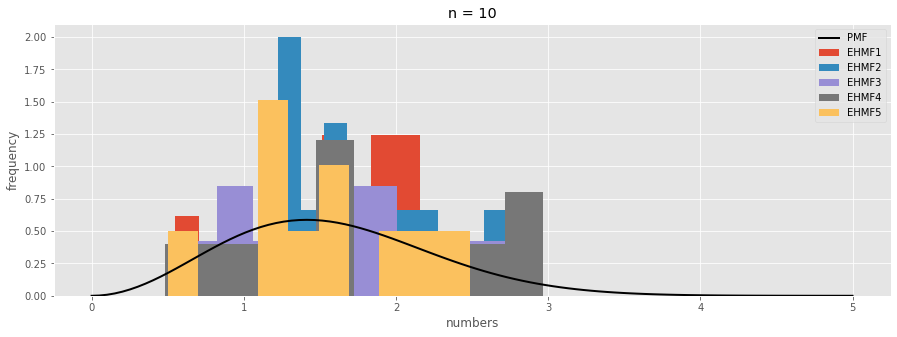

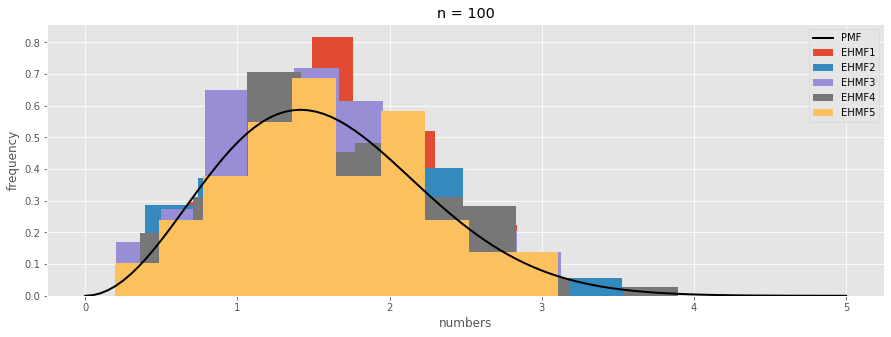

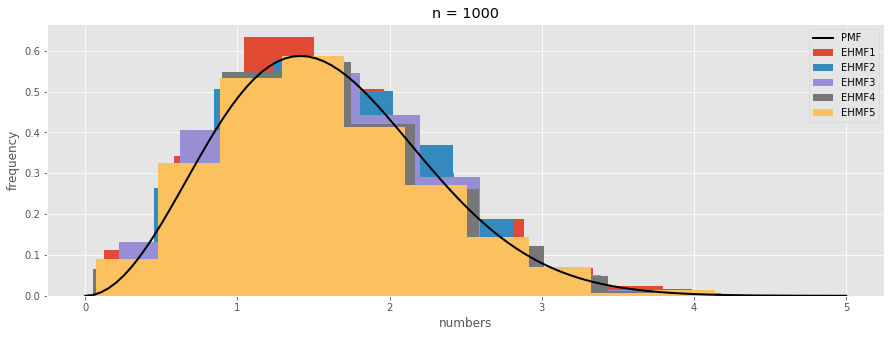

In [67]:
#n=5
for a in range(5):
    plt.hist(means__5[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 5")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=10
for a in range(5):
    plt.hist(means__10[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 10")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=100
for a in range(5):
    plt.hist(means__100[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 100")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()
#n=1000
for a in range(5):
    plt.hist(means__1000[a],density=True,label='EHMF{}'.format(a+1))
    plt.legend()
rv=maxwell()
x=np.linspace(0,5,100)
plt.plot(x,rv.pdf(x),'k-',lw=2,label='PMF')
plt.legend()
plt.title("n = 1000")
plt.xlabel("numbers")
plt.ylabel("frequency")
plt.show()

Для непрерывной случайной величины $\xi$, обладающей непрерывной плотностью f(x), также можно построить по соответствующей выборке $X = (X_1,...,X_n)$ статистический аналог $\hat f_n(x)$ для плотности f(x), который называется гистограммой. Для этого используется методгруппировки, в соответствии с которым область $\Delta$ возможных значений $\xi$ разбивается на некоторое число N непересекающихся интервалов $\Delta_1,...,\Delta_N$ (так что $\Delta = \bigcup_{r=1}^{N} \Delta_r$, подсчитывают числа $\nu_1,...,\nu_N$ наблюдений $X_1,...,X_n$, попавших в соответствующие интервалы:
$\nu_r = \sum_{j=1}^{N} I(X_j \in \Delta_r), r = 1,...,N$ (так что $\sum_{r=1}^{N} \nu_r = n,$   
и строят кусочно-постоянную функцию 
$$\hat f_n(x) = \frac{\nu_r}{n|\Delta_r|}$$
при x $\in \Delta_r, r = 1,...,N$  
Здесь $|\Delta_r|$ - длина интервала $\Delta_r$. То, что построенная по такому правилу гистограмма $\hat f_n(x)$ действительно "похожа" на теоретическую плотность f(x), следует из закона больших чисел, согласно которому при $n \rightarrow \infty$ относительная частота $\frac{\nu_r}{n}$ сближается с теоретической вероятностью  
$$P\{\xi \in \Delta_r\} = \int_{\Delta_r} f(x)dx$$
Но этот интеграл по теореме о среднем равен $f(a_r)|\Delta_r|$ где $a_r$ - некоторая внутренняя точка интервала $\Delta_r$(при малом $\Delta_r$ в качестве $a_r$ можно взять, например, середину интервала), Таким образом, при больших n и достаточно "мелком" разбиении $\{\Delta_r\} \hat f_n(x) \approx f(a_r)$ при $x \in \Delta_r$ т.е. гистограмма $\hat f_n(x)$ будет достаточно хорошо приближать график плотности f(x), следовательно, $\hat f_n(x)$  можно рассматривать в качестве статистического аналога (оценки) для f(x).Наряду с гистограммой, в качестве приближения для неизвестной теоретической плотности f(x) можно использовать кусочно-линейный график называемый полигоном частот. Он также считается статистическим аналогом теоретической плотности. Данные на полигоне частот и гистограммах подтверждают теоретические знания: с увеличением объема выборки полигон частот и гистограммы практически совпадают с теоретической плотностью f(x).

# 3 Домашнее задание. Оценки <a name="paragraph3"></a>

## 3.1. Геометрическое распределение <a name="subparagraph5"></a>

### 3.1.1 Нахождение выборочного среднего и выборочной дисперсии геометрического распределения

Наиболее важными характеристиками случайной величины $\xi$ являются ее моменты $\alpha_k = M\xi_k$ , а также цетральные моменты $\mu^k = M(\xi−α 1 )^k$ (когда они существуют). Их статистическими аналогами, вычисляемыми по соответсвующей выборке $X = (X_1 , ..., X_n ),$ являются выборочные моменты соотаетсвенно обычные:
$$\hat{\alpha}_{k}=\frac{1}{n}\sum_{i=1}^{n}X_{i}^k$$
и центральные:
$$\hat{\mu}_{k}=\frac{1}{n}\sum_{i=1}^{n}(X_{i}-\hat \alpha_1)^k$$
$\hat \alpha_1$ (принято обозначать, как $\overline X$) называют выборочным средним, $\mu^2$ - выборочной дисперсией. Таким образом, выборочное среднее и выборочная дисперсия являются статистическими аналогами теоритических среднего (математического ожидания) $M\xi$ и дисперсии $D\xi$, когда они существуют.

Выборочное среднее, относящийся к выборке $X$, считается как:

$$\overline{X}=\hat{\alpha}_{1}=\frac{1}{n}\sum_{i=1}^{n}X_{i}$$
Выборочная дисперсия, относящийся к выборке $X$, подсчитывается как:

$$S^{2}=\hat{\mu}_{2}=\frac{1}{n}\sum_{i=1}^{n}(X_{i}-\overline{X})^2$$

Найдем математическое ожидание и дисперсию выборочного среднего и выборочной
дисперсии:
$$M\overline X = \frac{1}{n}\sum_{i=1}^n MX_i = M\xi = \alpha_1$$
$$D\overline X = \frac{1}{n^2} \sum_{i=1}^{n} DX_i = \frac{1}{n}D\xi = \frac{\mu_2}{n}$$
Для выборочной дисперсии введем обозначение: $Y_i = X_i − \alpha_1 :$
$$S^2 = \hat \mu_2 = \frac{1}{n} \sum_{i=1}^{n}(Y_i - \overline Y)^2 = \frac{1}{n}\sum_{i=1}^{n}Y_i^2 - \overline Y^2$$
Поскольку $MY_i = 0, MY_i^2 = \mu_2$ и $MY_i Y_j = MY_j Y_i = 0, (i  \neq j),$ то:
$$M\overline Y^2 = \frac{1}{n^2}\sum_{i,j=1}^{n}MY_iY_j = \frac{1}{n^2}\sum_{i=1}^{n}MY_i^2 = \frac{\mu_2}{n}$$
Отсюда следует, что
$$MS^2 = \frac{n-1}{n}\mu_2$$
Перейдём к вычислению $DS^2$
$$(S^2)^2 = \frac{1}{n^2}(\sum_{i=1}^{n}Y_i^2)^2 - \frac{2}{n}\overline Y^2 \sum_{i=1}^{n}Y_i^2+\overline Y^4$$
Так как случайные величины $Y_1, ..., Y_n$ независимы и $MY_i = 0$, то в правой части равенства
$$M\overline Y^4 = \frac{1}{n^4}(n\mu_4 + 3n(n-1)\mu_2^2) = \frac{\mu_4+3(n-1)\mu_2^2}{n^3}$$
Аналогично находим
$$\frac{1}{n^2}M(\sum_{i=1}^{n}Y_i^2) = \frac{\mu_4+(n-1)\mu_2^2}{n} = M(\overline Y^2 \sum_{i=1}^{n}Y_i^2)$$
С учётом этих соотношений по формуле
$$DS^2 = M(S^2)^2-(MS^2)^2$$
получим
$$DS^2 = \frac{\mu_4-\mu_2^2}{n} - \frac{2(\mu_4-2\mu_2^2)}{n^2} + \frac{\mu_4-3\mu_2^2}{n^3} = \frac{(n-1)^2}{n^3}(\mu_4 - \frac{n-3}{n-1}\mu_2^2)$$
Аналогично можно находить моменты и более высоких порядков, хотя с увеличением порядка вид формул и их вывод усложняются.

Теперь рассмотрим свойства выборочных среднего и дисперсии при неограниченном возрастании объема выборки n, которые дадут нам ответ на вопрос, оценками каких параметров рапределений они являются. Чтобы подчеркнуть зависимость моментов $\hat \alpha_k , \hat \mu_k$ от объема выборки, будем в дальнейшем приписывать дополнительный индекс n: $\hat \alpha_{nk} , \hat \mu_{nk}$
$$M\hat \alpha_{nk} = \frac{1}{n}\sum_{i=1}^{n}MX_i^k = M\xi^k = \hat \alpha_k$$
$$D\hat \alpha_{nk} = \frac{1}{n^2}\sum_{i=1}^{n}DX_i^k = \frac{1}{n}D\xi^k = \frac{1}{n}(M\xi^{2k} - (M\xi^k)^2) = \frac{\alpha_{2k} - \alpha_k^2}{n}$$
На основании неравенства Чебышева, отсюда следует, что для любого $\epsilon$ > 0 при $n \rightarrow  \infty$
$$P {|\hat \alpha_{nk} − \alpha_k | < \epsilon} \rightarrow  1$$
т.е. выборочный момент $\hat \alpha_{nk}$ сходится по вероятности при $n \rightarrow \infty$ к соответствующему теоретическому моменту $\alpha_k$ . Таким образом, $\hat \alpha_{nk}$ можно использовать в качестве оценки $\alpha_k$, когда объем выборки достаточно велик. Аналогичное утверждение справедливо и
для центральных моментов: 
$$P {|\mu_{nk} − \mu_k | < \epsilon} \rightarrow  1$$
т.е. $\mu_{nk}$ можно использовать в качестве оценки $\mu_k$ , когда объем выборки достаточно велик.

1. Оценка $\hat{\theta}(X)$ параметра $\theta$ называется несмещенной, если:

$$E(\hat{\theta}(X))=\theta$$

2. Оценка $\hat{\theta}(X)=\hat{\theta}_{n}(X_{1},...,X_{n})$ параметра $\theta$ называется состоятельной, если при $n\to\infty$ соблюдается:

$$\hat{\theta}_{n}(X_{1},...,X_{n})\xrightarrow[]{p}\theta$$

При этом для проверки состоятельности достаточно убедиться, что соблюдены следующие два условия:

$$\lim\limits_{n\to\infty}E(\hat{\theta}_{n}(X_{1},...,X_{n}))=\theta$$

$$\lim\limits_{n\to\infty}Var(\hat{\theta}_{n}(X_{1},...,X_{n}))=0$$
Выборочное среднее является несмещенной оценкой для теоретического математического ожидания.
$$\hat{\alpha_1} = \frac{1}{n} \sum_{i=1}^{n} X_i$$
$$M\hat{\alpha_1} = M(\frac{1}{n}\sum_{i=1}^{n}x_i) = \frac{1}{n} \cdot n \cdot MX = MX$$
$$M\hat{\alpha_1} = MX$$
Выборочное среднее является состоятельной оценкой для теоретического математического ожидания.
$$\hat{\alpha_1} = \frac{1}{n} \sum_{i=1}^{n} X_i$$
$$\lim\limits_{n\to\infty} \hat{\alpha_1} = \lim\limits_{n\to\infty} \frac{1}{n} \sum_{i=1}^{n} X_i = \lim\limits_{n\to\infty} \frac{1}{n} \cdot n \cdot MX = MX$$
Выборочная дисперсия $S^2$ является состоятельной и несмещенной оценкой для теоретической дисперсии.
$$S^2 = \hat{\mu_2} = \frac{1}{n} \sum_{i=1}^{n} X_i^2 - \frac{1}{n} \sum_{i=1}^{n}(\hat{\alpha_1})^2 = MX^2 - \frac{1}{n} n(\hat{\alpha_1})^2 = \hat{\alpha_2} - (\hat{\alpha_1})^2$$
$$MS^2 = M(\hat{\alpha_2} - (\hat{\alpha_1})^2) = M(\frac{1}{n} \sum_{i=1}^{n}X_i^2) - M((\frac{1}{n} \sum_{i=1}^{n}X_i))^2 = MX^2 - (MX)^2 = DX$$

Продолжим исследование свойств выборочных моментов для больших выборок и рассмотрим теперь асимптотическое поведение их выборочных распределений.   
Если распределение случайной величины $\nu_n$ сходится при $n \rightarrow \infty$ к распределению случайной величины $\nu$ и при этом $\zeta(\nu) = N(\mu, \sigma^2)$, то будем писать $\zeta(\nu_n) \rightarrow N(\mu, \sigma^2)$. Далее иногда будем говорить, что случайная величина $\nu_n$ асимптотически нормальна $N(\mu_n, \sigma_n^2)$, и записывать это следующим образом:  
$\zeta(\nu_n) \approx N(\mu_n, \sigma_n^2)$, если $\zeta(\frac{\nu_n-\mu_n}{\sigma_n}) \rightarrow N(0,1)$.  
Найдем сначала асимптотические распределения выборочных моментов $\hat \alpha_{nk}$. Величина $n\hat \alpha_{nk} = \sum_{i=1}^n X_i^k$ является суммой независимых одинаково распределенных случайных величин. Если конечен момент $\alpha_{2k} = M\xi^{2k}$, то к этой сумме можно применить центральную предельную теорему теории вероятностей. Так как $MX_i^k = \alpha^k, DX_i^k = \alpha_{2k} - \alpha_k^2$, то величина  
$$\frac{n\hat \alpha_{nk}-n\alpha_k}{\sqrt{n(\alpha_{2k}-\alpha_k^2)}} = \frac{\hat \alpha_{nk} - \alpha_k}{\sqrt{\frac{\alpha_{2k} - \alpha_k^2}{n}}}$$  
асимтотически нормальна $N(0,1)$. Таким образом справедлива следующая теорема:   
Если конечен теоритический момент $\alpha_{2k}$ , то при $n \rightarrow  \infty$ выборочный момент $\hat \alpha_{nk}$ асимптотически нормален $N(\alpha_k, \frac{\alpha_{2k} - \alpha_k^2}{n})$  
Из теоремы следует, что если существует теоретическая дисперсия, то выборочное среднее $\hat \alpha_{n1}$ асимптотически нормально $N(\alpha_1, \frac{\mu_2}{n})$   
Из теоремы об асимптотической нормальности функций от выборочных моментов следует, что асимптотически нормальными являются и центральные выборочные моменты $\hat \mu_{nk}$, поскольку они являются непрерывными функциями (многочленами) от обычных выборочных моментов. 

#### Выборочное среднее

In [68]:
#n=5
vs_5 = []
for i in range(5):
    vs_5.append(np.mean(means_5[i]))
print(vs_5)
#n=10
vs_10 = []
for i in range(5):
    vs_10.append(np.mean(means_10[i]))
print(vs_10)
#n=100
vs_100 = []
for i in range(5):
    vs_100.append(np.mean(means_100[i]))
print(vs_100)
#n=1000
vs_1000 = []
for i in range(5):
    vs_1000.append(np.mean(means_1000[i]))
print(vs_1000)
#n=100000
vs_100000 = []
for i in range(5):
    vs_100000.append(np.mean(means_100000[i]))
print(vs_100000)

[2.4, 2.2, 2.8, 1.4, 2.6]
[2.2, 2.4, 2.0, 1.7, 2.7]
[2.02, 2.02, 1.91, 2.17, 1.98]
[1.978, 2.011, 2.058, 1.959, 1.954]
[2.0093, 2.0101, 2.01032, 1.99982, 2.00051]


$M\xi = \frac{1}{p}$, при p = 0.5 $M\xi = 2$

In [69]:
#Сравнение
p = 0.5
geom.stats(p, moments = 'm')

array(2.)

#### Выборочная дисперсия

In [70]:
#n=5
vd_5 = []
for i in range(5):
    vd_5.append(round(np.var(means_5[i]),6))
print(vd_5)
#n=10
vd_10 = []
for i in range(5):
    vd_10.append(round(np.var(means_10[i]),6))
print(vd_10)
#n=100
vd_100 = []
for i in range(5):
    vd_100.append(round(np.var(means_100[i]),6))
print(vd_100)
#n=1000
vd_1000 = []
for i in range(5):
    vd_1000.append(round(np.var(means_1000[i]),6))
print(vd_1000)
#n=100000
vd_100000 = []
for i in range(5):
    vd_100000.append(round(np.var(means_100000[i]),6))
print(vd_100000)

[2.24, 3.76, 2.16, 0.64, 1.04]
[2.36, 1.04, 0.8, 0.61, 2.41]
[2.5196, 2.2396, 1.6819, 2.3811, 2.8596]
[1.955516, 2.090879, 2.188636, 1.845319, 1.699884]
[2.033354, 2.020038, 2.033233, 2.02872, 1.99785]


$$D\xi = \frac{q}{p^2} = \frac{1-p}{p^2}$$
При p = 0.5, $D\xi = 2$

In [71]:
#Сравнение
geom.stats(p,moments = 'v')

array(2.)

Как видно из полученных значений, чем больше объём выборки, тем менее отличаются выборочное среднее от теоретического математического ожидания и выборочная дисперсия от теоретической дисперсии

### 3.1.2 Построение доверительного интервала для выборочного среднего

Определение: $\gamma$ - доверительным интервалом для g называется такой случайный интервал $(T_1(X), T_2(X)), T_1(X) < T_2(X)$, который содержит внутри себя (накрывает) неизвестное значение g с вероятностью, не меньшей $\gamma$:
$$P\{T_1(X) < g < T_2(X)\} \geq \gamma$$
Здесь $T_1(X)$ и $T_2(X)$ - некоторые статистики (функции от выборки), называемые соответственно нижней и верхней доверительными границами, а $\gamma$ - задаваемый заранее доверительный уровень, который обычно выбирается близким к 1. Длина доверительного интервала характеризует точность локализации оцениваемой характеристики g, а величина $\gamma$ является показателем надежности доверительного интервала.   
В сформулированной ранее теореме [Если конечен теоритический момент $\alpha_{2k}$ , то при $n \rightarrow  \infty$ выборочный момент $\hat \alpha_{nk}$ асимптотически нормален $N(\alpha_k, \frac{\alpha_{2k} - \alpha_k^2}{n})$ ] можно заменить асимптотическую дисперсию $\frac{\alpha_{2k} - \alpha_k^2}{n}$ ее оценкой $\frac{\hat \alpha_{n, 2k} - \hat \alpha_{nk}^2}{n}$. Это дает искомый асимптотический $\gamma$-доверительный интервал для момента $\alpha_k$ вида:   
$$(\hat \alpha_{nk} \mp c_{\gamma} \sqrt{\frac{\hat \alpha_{n, 2k} - \hat \alpha_{nk}^2}{n}})$$
Полагая здесь k = 1, получим соответствующий интервал для теоретического среднего $\alpha_1 = M\xi$:
$$(\overline X \mp \frac{c_{\gamma}S}{\sqrt{n}})$$
Чтобы построить асимптотический $\gamma$-доверительный интервал для теоретической дисперсии $\mu_2 = D\xi$, надо просто воспользоваться результатом теоремы об  асимптотической нормальности выборочной дисперсии [$\zeta(\frac{\sqrt{n}(S^2-\mu_2)}{\sqrt{\hat \mu_{n4} - S^4}}) \rightarrow N(0,1)$]: искомый интервал есть
$$(S^2 \mp c_{\gamma} \sqrt{\frac{\hat \mu_{n4} - S^4}{n}})$$

Положим $\gamma = 0.95$ и найдем доверительный интервал для выборочного среднего.  
$$Ф(c_{\gamma}) = \frac{\gamma}{2} = 0.475$$
Из таблицы значений функции Лапласа $c_{\gamma} \approx 1.96$

In [77]:
#n=5
print('n = 5')
for i in range(5):
    print('(', vs_5[i], '-+ 1.96 *', np.sqrt(vd_5[i]/5), ') = (', vs_5[i], '-+', round(1.96*np.sqrt(vd_5[i]/5), 6), ')')
#n=10
print('n = 10')
for i in range(5):
    print('(', vs_10[i], '-+ 1.96 *', np.sqrt(vd_10[i]/10), ')= (', vs_10[i], '-+', round(1.96*np.sqrt(vd_10[i]/10), 6), ')')
#n=100
print('n = 100')
for i in range(5):
    print('(', vs_100[i], '-+ 1.96 *', np.sqrt(vd_100[i]/100), ') = (', vs_100[i], '-+', round(1.96*np.sqrt(vd_100[i]/100), 6), ')')
#n=1000
print('n = 1000')
for i in range(5):
    print('(', vs_1000[i], '-+ 1.96 *', np.sqrt(vd_1000[i]/1000), ') = (', vs_1000[i], '-+', round(1.96*np.sqrt(vd_1000[i]/1000), 6), ')')
#n=100000
print('n = 100000')
for i in range(5):
    print('(', vs_100000[i], '-+ 1.96 *', np.sqrt(vd_100000[i]/100000), ') = (', vs_100000[i], '-+', round(1.96*np.sqrt(vd_100000[i]/100000), 6), ')')

n = 5
( 1.8 -+ 1.96 * 0.33466401061363027 ) = ( 1.8 -+ 0.655941 )
( 1.6 -+ 1.96 * 0.35777087639996635 ) = ( 1.6 -+ 0.701231 )
( 2.6 -+ 1.96 * 0.8294576541331088 ) = ( 2.6 -+ 1.625737 )
( 1.4 -+ 1.96 * 0.35777087639996635 ) = ( 1.4 -+ 0.701231 )
( 2.4 -+ 1.96 * 0.4560701700396552 ) = ( 2.4 -+ 0.893898 )
n = 10
( 2.0 -+ 1.96 * 0.4 )= ( 2.0 -+ 0.784 )
( 3.2 -+ 1.96 * 0.7720103626247513 )= ( 3.2 -+ 1.51314 )
( 2.1 -+ 1.96 * 0.7543208866258444 )= ( 2.1 -+ 1.478469 )
( 1.6 -+ 1.96 * 0.322490309931942 )= ( 1.6 -+ 0.632081 )
( 1.5 -+ 1.96 * 0.291547594742265 )= ( 1.5 -+ 0.571433 )
n = 100
( 1.97 -+ 1.96 * 0.13817018491700733 ) = ( 1.97 -+ 0.270814 )
( 1.72 -+ 1.96 * 0.10007996802557444 ) = ( 1.72 -+ 0.196157 )
( 2.45 -+ 1.96 * 0.17342145196024625 ) = ( 2.45 -+ 0.339906 )
( 1.94 -+ 1.96 * 0.1412940196894405 ) = ( 1.94 -+ 0.276936 )
( 1.94 -+ 1.96 * 0.13024592124131948 ) = ( 1.94 -+ 0.255282 )
n = 1000
( 2.027 -+ 1.96 * 0.04624144245154989 ) = ( 2.027 -+ 0.090633 )
( 1.943 -+ 1.96 * 0.0433099411

*Округлено до 6 знаков после запятой.

### 3.1.3 Нахождение оптимальности рассматриваемых оценок

Для построения теории оптимального оценивания прежде всего надо договориться о мере точности оценок, т.е. уточнить смысл приближенного равенства $T(X) \approx g$. Если статистика T(x) используется для оценивания g, то одной из разумных мер расхождения между ними является $(T(X) − g)^2$ , или квадратичная ошибка. Но так как это величина случайная используется среднеквадратичная ошибка (с. к. о.) $\Delta(T ) = M(T(X) − g)^2$.  
Определение: Оценка минимизирующая с. к. о. в данном классе оценок $T_g$ называется оптимальной в среднеквадратичном смысле и обозначается $T^*$ :
$$T^* = arg min_{T \in T_g} \Delta(T)$$
Пусть требуется оценить заданную параметрическую функцию $τ(\theta)$ в модели $F = {F (x; \theta), \theta \in \Theta}$ по соответствующей выборке $X = (X_1, ..., X_n)$. Обозначим $τ_τ$ класс всех несмещенных оценок $T = T(X)$ для $τ(\theta)$ и предположим, что он не пуст. Дополнительно предположим, что дисперсии всех оценок из класса $τ_τ$ конечны: $D\theta T = M_\theta (T − τ(\theta)) 2 < \infty$, в этом случае мерой точности оценок является их дисперсия.   
Утверждение: Для несмещенных оценок среднеквадратичное отклонение совпадает с ее дисперсией, а для смещенной оценки больше ее дисперсии.   
Доказательство: 
$$M\theta(T − τ )^2 = M(T − MT + MT − τ )^2 = M(T − MT)^2 + M(MT − τ)^2 + 2M((T − MT)(MT − τ)) =DT + b^2 + 0;$$ 
$$b^2 = 0 ⇐⇒ MT = τ$$
Теорема Рао-Блэкуэлла-Колмогорова: Оптимальная оценка, если она существует, является функцией от достаточной статистики.  
По определению достаточная статистика T = T(X) называется полной, если для всякой функции $φ(T)$ из того, что
$$M_\thetaφ(T) = 0, ∀\theta$$
следует $φ(t) ≡ 0$ на всем множестве значений статистики T.  
Теорема: Если существует полная достаточная статистика, то всякая функция от нее является оптимальной оценкой своего математического ожидания.  
Итак, пусть существует полная достаточная статистика T = T(X) и требуется оценить заданную параметрическую функию $τ(\theta)$. Тогда:  
1)Если существует какая-то несмещенная оценка $τ(\theta)$, то существует и несмещенная оценка, являющаяся функцией от T; можно так же сказать, что если нет несмещенныхоценок вида H(T), то класс несмещенных оценок $τ_τ$ для $τ(\theta)$ пуст;   
2)оптимальная (н.о.р.м.д.) оценка когда она существует, всегда является функцией
от T и она однозначно определяется уравнением $M_\theta H(T) = τ(\theta)$  
3)оптимальную оценку $τ^∗$ можно искать по формуле:
$$τ^∗ = H(T) = M_\theta (T_1|T)$$
исходя из любой несмещенной оценки $T_1$ функции $τ(\theta)$.

Найдем оптимальную оценку для параметра $p = \theta_1:$  
Рассмотрим произвольную из сгенерированных выборку $X = (X_1, ..., X_m )$ из геометрического распределения. Для параметра $\theta_1$ множество несмещенных оценок не пусто.   
$$\overline x = M_1 = \sum_{k=1}^{\infty}pq^{k-1}k = p\sum_{k=1}^{\infty}q^{k-1}k = \frac{1}{p}$$
$$D = M_c^2 = M(x-\overline x)^2 = p\sum_{k=1}^{\infty}q^{k-1}k^2 = \frac{q}{p^3} = M_1\frac{q}{p^2}$$
По методу моментов оценка $\hat \theta_1 = ... = ... =\frac{1}{\theta_1}$
$$M = ... = \frac{1}{\theta_1}$$
$$D\xi = \frac{1-\theta_1}{\theta_1^2}$$
Запишем логарифмическую функцию правдоподобия:  
$$lnL(p) = ln[p^n \prod_{i=1}^{n}(1-p)^{x_i-1}] = ln[p^n]+ln[\prod_{i=1}^{n}(1-p)^{x_i-1}] = nlnp+ \sum_{i=1}^{n}ln((1-p)^{x_i-1}) = nlnp + \sum_{i=1}^{n}(x_i-1)ln(1-p) = nlnp + ln(1-p)\sum_{i=1}^{n}(x_i-1) = nlnp + \sum_{i=1}^{n}(x_i-1)ln(1-p) = nlnp+ln(1-p)\sum_{i=1}^{n}(x_i-1) = nlnp+ln(1-p)(\sum_{i=1}^{n}x_i - n) = nlnp + ln(1-p)\sum_{i=1}^{n}x_i - nln(1-p)$$
Условия экстремума:  
$$\frac{dlnL}{dp} = (nlnp + ln(1-p)\sum_{i=1}^{n}x_i - nln(1-p)) = n \cdot \frac{1}{p} + \frac{-1}{1-p}\sum_{i=1}^{n}x_i - n\frac{-1}{1-p} = 0,$$
$$n\cdot \frac{1}{p} + \frac{1}{p-1}\sum_{i=1}^{n}x_i - n\cdot \frac{1}{p-1} = 0,$$
Преобразуем:
$$\frac{1}{p-1}(\sum_{i=1}^{n}x_i - n) = -n\cdot \frac{1}{p}$$
$$-\frac{p-1}{p} = \frac{\sum_{i=1}^{n}x_i - n}{n}$$
$$\frac{1}{p} - 1 = \frac{1}{n}\sum_{i=1}^{n}x_i - 1$$
$$\frac{1}{p} = \frac{1}{n}\sum_{i=1}^{n}x_i$$
$$p = \frac{1}{\frac{1}{n}\sum_{i=1}^{n}x_i}$$
Таким образом, в качестве оценки получаем: 
$$\hat \theta_1 = \frac{1}{\frac{1}{n}\sum_{i=1}^{n}x_i} = \frac{1}{\theta}$$

## 3.2 Распределения Максвелла <a name="subparagraph6"></a>

### 3.2.1 Нахождение выборочного среднего и выборочной дисперсии геометрического распределения

#### Выборочное среднее

In [72]:
#n=5
vs__5 = []
for i in range(5):
    vs__5.append(round(np.mean(means__5[i]),6))
print(vs__5)
#n=10
vs__10 = []
for i in range(5):
    vs__10.append(round(np.mean(means__10[i]),6))
print(vs__10)
#n=100
vs__100 = []
for i in range(5):
    vs__100.append(round(np.mean(means__100[i]),6))
print(vs__100)
#n=1000
vs__1000 = []
for i in range(5):
    vs__1000.append(round(np.mean(means__1000[i]),6))
print(vs__1000)
#n=100000
vs__100000 = []
for i in range(5):
    vs__100000.append(round(np.mean(means__100000[i]),6))
print(vs__100000)

[1.915438, 1.095802, 1.249879, 0.910554, 1.714316]
[1.577273, 1.727918, 1.602861, 1.788271, 1.522487]
[1.664325, 1.623293, 1.442467, 1.652924, 1.605711]
[1.599327, 1.606045, 1.588832, 1.574616, 1.550436]
[1.590289, 1.593489, 1.59538, 1.593763, 1.594673]


In [73]:
#Сравнение
2*np.sqrt(2/np.pi)

1.5957691216057308

$$M\xi = 2\lambda \sqrt{\frac{2}{\pi}}$$
При $\lambda = $ 1.0 $M\xi = 2\cdot \sqrt{\frac{2}{\pi}} \approx 1.5957691216057308$ 

#### Выборочная дисперсия

In [74]:
#n=5
vd__5 = []
for i in range(5):
    vd__5.append(round(np.var(means__5[i]),6))
print(vd__5)
#n=10
vd__10 = []
for i in range(5):
    vd__10.append(round(np.var(means__10[i]),6))
print(vd__10)
#n=100
vd__100 = []
for i in range(5):
    vd__100.append(round(np.var(means__100[i]),6))
print(vd__100)
#n=1000
vd__1000 = []
for i in range(5):
    vd__1000.append(round(np.var(means__1000[i]),6))
print(vd__1000)
#n=100000
vd__100000 = []
for i in range(5):
    vd__100000.append(round(np.var(means__100000[i]),6))
print(vd__100000)

[0.406101, 0.287325, 0.097846, 0.057745, 0.327642]
[0.251981, 0.210423, 0.524976, 0.650905, 0.281158]
[0.359419, 0.474391, 0.422773, 0.447515, 0.395477]
[0.457396, 0.431927, 0.44121, 0.44778, 0.477308]
[0.451604, 0.45236, 0.453762, 0.453338, 0.456103]


In [75]:
#Сравнение
(3*np.pi-8)/np.pi

0.4535209105296745

$$D\xi = \frac{3\pi -8}{\pi}\cdot \lambda$$
При $\lambda = $ 1.0 $D\xi = \frac{3\pi - 8}{\pi} \approx 0.4535209105296745$

Как видно из полученных значений, чем больше объём выборки, тем менее отличаются выборочное среднее от теоретического математического ожидания и выборочная дисперсия от теоретической дисперсии.

### 3.2.2 Построение доверительного интервала для выборочного среднего

Положим $\gamma = 0.95$ и найдем доверительный интервал для выборочного среднего.  
$$Ф(c_{\gamma}) = \frac{\gamma}{2} = 0.475$$
Из таблицы значений функции Лапласа $c_{\gamma} \approx 1.96$

In [76]:
#n=5
print('n = 5')
for i in range(5):
    print('(', vs__5[i], '-+ 1.96 *', np.sqrt(vd__5[i]/5), ') = (', vs__5[i], '-+', round(1.96*np.sqrt(vd__5[i]/5), 6), ')')
#n=10
print('n = 10')
for i in range(5):
    print('(', vs__10[i], '-+ 1.96 *', np.sqrt(vd__10[i]/10), ')= (', vs__10[i], '-+', round(1.96*np.sqrt(vd__10[i]/10), 6), ')')
#n=100
print('n = 100')
for i in range(5):
    print('(', vs__100[i], '-+ 1.96 *', np.sqrt(vd__100[i]/100), ') = (', vs__100[i], '-+', round(1.96*np.sqrt(vd__100[i]/100), 6), ')')
#n=1000
print('n = 1000')
for i in range(5):
    print('(', vs__1000[i], '-+ 1.96 *', np.sqrt(vd__1000[i]/1000), ') = (', vs__1000[i], '-+', round(1.96*np.sqrt(vd__1000[i]/1000), 6), ')')
#n=100000
print('n = 100000')
for i in range(5):
    print('(', vs__100000[i], '-+ 1.96 *', np.sqrt(vd__100000[i]/100000), ') = (', vs__100000[i], '-+', round(1.96*np.sqrt(vd__100000[i]/100000), 6), ')')

n = 5
( 1.915438 -+ 1.96 * 0.284991578822954 ) = ( 1.915438 -+ 0.558583 )
( 1.095802 -+ 1.96 * 0.23971858501167573 ) = ( 1.095802 -+ 0.469848 )
( 1.249879 -+ 1.96 * 0.13988995675172683 ) = ( 1.249879 -+ 0.274184 )
( 0.910554 -+ 1.96 * 0.10746627377926528 ) = ( 0.910554 -+ 0.210634 )
( 1.714316 -+ 1.96 * 0.2559851558196295 ) = ( 1.714316 -+ 0.501731 )
n = 10
( 1.577273 -+ 1.96 * 0.15873909411357998 )= ( 1.577273 -+ 0.311129 )
( 1.727918 -+ 1.96 * 0.14505964290594403 )= ( 1.727918 -+ 0.284317 )
( 1.602861 -+ 1.96 * 0.22912354745857091 )= ( 1.602861 -+ 0.449082 )
( 1.788271 -+ 1.96 * 0.2551283990464409 )= ( 1.788271 -+ 0.500052 )
( 1.522487 -+ 1.96 * 0.16767766696850242 )= ( 1.522487 -+ 0.328648 )
n = 100
( 1.664325 -+ 1.96 * 0.05995156378277384 ) = ( 1.664325 -+ 0.117505 )
( 1.623293 -+ 1.96 * 0.06887604808639938 ) = ( 1.623293 -+ 0.134997 )
( 1.442467 -+ 1.96 * 0.06502099660878784 ) = ( 1.442467 -+ 0.127441 )
( 1.652924 -+ 1.96 * 0.06689656194454241 ) = ( 1.652924 -+ 0.131117 )
( 1.6057

*Округлено до 6 знаков после запятой.

### 3.2.3 Нахождение оптимальности рассматриваемых оценок

Для простоты предположим, что все частоты $p_i, i = \overline {1,n}$ равны единице.  
Запишем функцию максимального правдоподобия для закона Максвелла.  
$$L(\lambda) = (\frac{2}{\pi})^{\frac{n}{2}} \frac{\prod_{i=1}^{n}x_i^2}{\lambda^{3n}} e^{-\frac{1}{2\lambda^2}\sum_{i=1}^{n}x_i^2}$$
$$ln(L(\lambda)) = 2\sum_{i=1}^{n}ln x_j - 3nln\lambda - \frac{n}{2}ln\frac{2}{\pi}-\frac{1}{2\lambda^2}\sum_{i=1}^{n}x_i^2$$
$$\frac{\partial(lnL(\lambda))}{\partial \lambda} = -\frac{3n}{\lambda} + \frac{\sum_{i=1}^{n}x_i^2}{\lambda^3} = 0$$
Переходя к статистическому ряду (не все $p_i$ равны 1, $i = \overline {1,n}$), получим уравнение для нахождения $\lambda$:
$$\lambda = \sqrt{\frac{\sum_{i=1}^{m}p_ix_i^2}{3n}}$$
Оценка методом моментов:  
Поскольку по выборке оценивается лишь один параметр, то для нахождения $\lambda$ используемся оценку математического ожидания.  
$$M[X] = \overline X = 2\lambda \sqrt{\frac{2}{\pi}},$$ где $\overline X = \frac{1}{n}\sum_{i=1}^{m}x_ip_i$, $\sum_{i=1}^{m}p_i = n$  
Отсюда $\lambda = \sqrt{\frac{\pi}{8}}\overline X$

## 3.3 Работа с данными <a name="subparagraph7"></a>

В данном задании проведем анализ реальных данных. Воспользуемся нетипичной интерпретацией геометрического распределения - игра бейсбол. В бейсболе геометрическое распределение полезно для анализа вероятности того, что отбивающий получит удар, прежде чем он получит три удара; здесь цель - добиться успеха за 3 испытания.   
Рассмотрим финальную серию чемпионата МЛБ-2020 между Лос Анджелес Доджерс и Тампа-Бэй Рэйс. Проанализируем статистику бэттеров первых 5 матчей, чтобы оценить какие бэттеры должны чаще выходить на поле в последнем матче серии и сравним с тем, как на самом деле это было. Почему принято решение выбрать именно такой подход? Всё из-за того, что чем выше процент отбивания у бэттера, тем выше вероятность того, что произойдет успех. Докажем это:  
Пусть вероятность того, что бэттер отобьёт удар равна p. Тогда рассчитаем вероятность успеха:  
$$P(X=0) + P(X=1) + P(X=2) = q^0p + q^1p + q^2p = p + (1-p)p + (1-p)^2 p = p + p - p^2 + p -2p^2 + p^3 = p(p^2-3p+3)$$  
Пройдемся по циклу и убедимся, что при увеличении p увеличивается и вероятность успеха.

In [77]:
for p in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(p*(p**2-3*p+3))

0.271
0.488
0.6569999999999999
0.784
0.875
0.9359999999999999
0.9730000000000002
0.9919999999999999
0.9989999999999999


Рассмотрим статистические показатели, которые нам пригодятся:  
AB - At Bats = PA - BB - IBB - HBP - CI - SF - SH (На бите): Выходы на биту бэттера, за исключением уоков, ударов мячом, пожертвованных ударов, умышленных помех со стороны защиты или других препятствий.   
H - Hits (Хиты): общее количество хитов (1B, 2B, 3B и HR). Хит - удар, давший возможность выйти на базу. При этом защита не совершила ошибку.  
BA - Batting average = H / AB (он же AVG - средний коэффициент результативности отбивания): число хитов, деленное на число выходов на биту.

In [78]:
match_1 = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-1.csv',',',parse_dates=['Игрок'])
match_2 = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-2.csv',',',parse_dates=['Игрок'])
match_3 = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-3.csv',',',parse_dates=['Игрок'])
match_4 = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-4.csv',',',parse_dates=['Игрок'])
match_5 = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-5.csv',',',parse_dates=['Игрок'])

In [79]:
match_1

,Игрок,Команда,AB,H,BA
0,Adames W.,TAM,2,0,0.000
1,Arozarena R.,TAM,3,0,0.000
2,Barnes A.,LAD,4,0,0.000
3,Bellinger C.,LAD,4,1,0.250
4,Betts M.,LAD,4,2,0.500
5,Brosseau M.,TAM,1,1,1.000
6,Choi Ji-Man,TAM,0,0,0.000
7,Diaz Y.,TAM,4,1,0.250
8,Hernandez E.,LAD,2,1,0.500
9,Kiermaier K.,TAM,3,2,0.667


In [80]:
match_2

,Игрок,Команда,AB,H,BA
0,Adames W.,TAM,4,1,0.167
1,Arozarena R.,TAM,3,1,0.167
2,Barnes A.,LAD,1,0,0.000
3,Bellinger C.,LAD,3,0,0.143
4,Betts M.,LAD,3,0,0.286
5,Brosseau M.,TAM,2,0,0.333
6,Choi Ji-Man,TAM,3,1,0.333
7,Diaz Y.,TAM,1,1,0.400
8,Hernandez E.,LAD,1,0,0.333
9,Kiermaier K.,TAM,4,0,0.286


In [81]:
match_3

,Игрок,Команда,AB,H,BA
0,Adames W.,TAM,3,1,0.222
1,Arozarena R.,TAM,4,1,0.200
2,Barnes A.,LAD,3,1,0.125
3,Bellinger C.,LAD,4,1,0.182
4,Betts M.,LAD,5,2,0.333
5,Choi Ji-Man,TAM,4,0,0.143
6,Hernandez E.,LAD,1,0,0.250
7,Kiermaier K.,TAM,2,0,0.222
8,Lowe B.,TAM,4,0,0.154
9,Margot M.,TAM,3,1,0.400


In [82]:
match_4

,Игрок,Команда,AB,H,BA
0,Adames W.,TAM,4,1,0.231
1,Arozarena R.,TAM,4,3,0.357
2,Bellinger C.,LAD,4,0,0.133
3,Betts M.,LAD,5,0,0.235
4,Brosseau M.,TAM,2,1,0.400
5,Choi Ji-Man,TAM,0,0,0.143
6,Diaz Y.,TAM,3,0,0.250
7,Hernandez E.,LAD,4,1,0.250
8,Kiermaier K.,TAM,4,2,0.308
9,Lowe B.,TAM,4,1,0.176


In [83]:
match_5

,Игрок,Команда,AB,H,BA
0,Adames W.,TAM,4,0,0.176
1,Arozarena R.,TAM,4,1,0.333
2,Barnes A.,LAD,2,0,0.100
3,Bellinger C.,LAD,4,1,0.158
4,Betts M.,LAD,5,1,0.227
5,Brosseau M.,TAM,0,0,0.400
6,Choi Ji-Man,TAM,0,0,0.143
7,Diaz Y.,TAM,3,2,0.364
8,Hernandez E.,LAD,1,0,0.222
9,Kiermaier K.,TAM,3,2,0.375


In [84]:
itog = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Итого.csv',',',parse_dates=['Игрок'])
itog

,Игрок,Команда,AB,H,BA
0,Adames W.,TAM,17,3,"0,176470588235294"
1,Arozarena R.,TAM,18,6,"0,333333333333333"
2,Barnes A.,LAD,10,1,"0,1"
3,Bellinger C.,LAD,19,3,"0,157894736842105"
4,Betts M.,LAD,22,5,"0,227272727272727"
5,Brosseau M.,TAM,5,2,"0,4"
6,Choi Ji-Man,TAM,7,1,"0,142857142857143"
7,Diaz Y.,TAM,11,4,"0,363636363636364"
8,Hernandez E.,LAD,9,2,"0,222222222222222"
9,Kiermaier K.,TAM,16,6,"0,375"


А теперь попробуем спрогнозировать кто из бэттеров будет подходить к бите больше в своей команде, анализируя приведенные выше статистические данные по итогам первых 5 матчей финальной серии. Выведем данные в порядке убывания.

In [85]:
prognoz_TAM = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Итого_TAM.csv',',',parse_dates=['Игрок'])
prognoz_TAM

,Игрок,Команда,AB,H,BA,Комментарий
0,Margot M.,TAM,15,6,"0,4","Лучший BA, один из лучших AB"
1,Arozarena R.,TAM,18,6,"0,333333333333333",Один из лидеров по AB и отличный BA
2,Adames W.,TAM,17,3,"0,176470588235294",Один из лидеров по AB и средний BA
3,Lowe B.,TAM,21,3,"0,142857142857143","Лучший AB, но значимо хуже BA"
4,Kiermaier K.,TAM,16,6,"0,375",Очень хороший BA и неплохой AB
5,Wendle J.,TAM,15,2,"0,133333333333333",Примерно равные средние показатели
6,Meadows A.,TAM,13,2,"0,153846153846154",Примерно равные средние показатели
7,Diaz Y.,TAM,11,4,"0,363636363636364","Отличный BA, но все же низкий AB"
8,Zunino M.,TAM,13,0,0,"Приличный AB, но худший BA"
9,Choi Ji-Man,TAM,7,1,"0,142857142857143",Низкие AB и BA


А теперь посмотрим, сколько в итоге было подходов к бите у игроков TAM. Выведем данные в порядке убывания.

In [86]:
match_6_TAM = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-6_TAM.csv',',',parse_dates=['Игрок'])
match_6_TAM

,Игрок,Команда,AB,H
0,Margot M.,TAM,4,0
1,Arozarena R.,TAM,4,2
2,Adames W.,TAM,4,0
3,Lowe B.,TAM,3,0
4,Kiermaier K.,TAM,3,1
5,Wendle J.,TAM,3,0
6,Meadows A.,TAM,3,1
7,Zunino M.,TAM,3,1
8,Choi Ji-Man,TAM,2,0
9,Diaz Y.,TAM,1,0


In [87]:
prognoz_LAD = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Итого_LAD.csv',',',parse_dates=['Игрок'])
prognoz_LAD

,Игрок,Команда,AB,H,BA,Комментарий
0,Turner J.,LAD,22,8,"0,363636363636364","Лучший AB, один из лучших BA"
1,Betts M.,LAD,22,5,"0,227272727272727","Лучший AB, высокий BA"
2,Seager C.,LAD,17,8,"0,470588235294118","Высокий AB, лучший BA"
3,Muncy M.,LAD,18,7,"0,388888888888889","Высокий AB, один из лучших BA"
4,Taylor C.,LAD,20,4,"0,2","Высокий AB, неплохой BA"
5,Smit U.,LAD,21,3,"0,142857142857143","Высокий AB, неплохой BA"
6,Bellinger C.,LAD,19,3,"0,157894736842105","Высокий AB, неплохой BA"
7,Pederson J.,LAD,10,4,"0,4","Средний AB, высокий BA"
8,Hernandez E.,LAD,9,2,"0,222222222222222",Средние показатели
9,Barnes A.,LAD,10,1,"0,1",Средние показатели


А теперь посмотрим, сколько в итоге было подходов к бите у игроков LAD. Выведем данные в порядке убывания.

In [88]:
match_6_LAD = pd.read_csv('/home/alexander/Рабочий стол/Курсовая/Матч-6_LAD.csv',',',parse_dates=['Игрок'])
match_6_LAD

,Игрок,Команда,AB,H
0,Betts M.,LAD,4,2
1,Muncy M.,LAD,4,0
2,Turner J.,LAD,3,0
3,Seager C.,LAD,3,0
4,Taylor C.,LAD,3,1
5,Smit U.,LAD,3,1
6,Bellinger C.,LAD,3,0
7,Barnes A.,LAD,3,1
8,Pollock A.,LAD,2,0
9,Hernandez E.,LAD,1,0


Оценка того, кто больше из игроков будет подходить к бите в своей команде оказалось достаточно точной, несмотря на то, что данные были взяты лишь по 5 последним играм, что подтверждает важность этих показателей у игроков. Конечно же, по данным за такой короткий период корректировку могли внести такие ситуации как, например, травмы игроков, из-за которых они не смогли бы участвовать в 6 финальном матче или же участвовать в нём не в полной мере.  
Обычно в бейсболе статистику игроков оценивают по всему прошедшему сезону, что даст более высокую точность. 

Как можно заметить, рассмотренные статистические показатели у игроков команды LAD лучше, чем у игроков команды TAM. Отсюда неудивительно, что LAD выиграли не только последний матч у TAD со счетом 3:1, но и всю финальную серию со счетом 4:2 и стали чемпионами MLB-2020.

Ссылка на данные:
https://www.scoreboard.com/ru/baseball/usa/mlb-2020/

# 4 Домашнее задание. Проверка статистических гипотез <a name="paragraph4"></a>

1.Критерий согласия Колмагорова  
Пусть дана выборка $X = (X_1,..., X_n)$ из распределения $L(\xi) и F\xi$ - неизвестное распределение.  
- $H_0 : F\xi = F(x)$ - простая гипотеза  
- $H_1 : не F(x)$  
Критерий Колмогорова основан на теореме Колмогорова:  
$$D_n = D_n(x) = sup|\hat F_n(x) − F(x)|_{x \in R}$$
где $D_n$ - это отклонение эмпирической функции распределения от теоретической функции распределения.  
$\hat F_n$ - оптимальная несмещенная состоятельная оценка для F(x).  
Замечание: $D_n$ не должно сильно отклоняться от 0.  
По т. Колмогорова:
$$P(nD_n \geq \lambda_\alpha |H_0 ) = 1 − K(\lambda_\alpha) = \alpha$$
по $\alpha → \lambda_\alpha$  
Проверяем, выполняется ли неравенство: $nD_n \geq \lambda_\alpha$  
Известно, что
$$X_1 = \{x : D_n(x)\sqrt{n} \geq \lambda_\alpha \}$$
Следовательно, $H_0$ отвергается $⇔ nD_n \geq \lambda_\alpha$  
По Долошеву: $^{6nD_n}_{6 \sqrt{n}}$ сходится к распределению Колмогорова, причем $\sqrt{n}D_n \in \frac{1}{6\sqrt{n}}$  
Способ вычисления $D_n = sup | F_n(x) − F(x)|_{x \in R}$. Вычисление супремума функции не является тривиальной задачей. Однако в данном случае $\hat F_n (x)$ принимает конечное число
значений: $\{ _n^1 , _n^2 ,..., _n^n\}$, что значительно упрощает задачу. Пусть у нас есть вариационный ряд выборки: $X_{(1)} , X_{(2)} , . . . , X_{(n)}$. Определим следующие две функции:
$$D_n^+ = max_{1 \leq k \leq n} |\frac{k}{n} - F(x_{(k)})|$$
$$D_n^- = max_{1 \leq k \leq n} |F(x_{(k)}) - \frac{k-1}{n}|$$
Тогда вычислить $D_n$ можно следующим образом:
$$D_n = max\{D_n^− , D_n^+\}$$
Однако критерий Колмагорова обладает рядом минусов:
1.Функция $D_n = sup | F_n(x) − F(x)|_{x \in R}$ не зависит от вида функции распределения F(x), только в случае если F (x) непрерывная. Встает вопрос, что делать если F (x) имеет точки разрыва.  
Пусть $Y_1,..., Y_n$ - н.о.р.сл.в. $Y_i \approx R[0, 1]$. А $X_1,..., X_n$ - выборка из некоторого распределения, функция которого имеет точки разрыва. Построим следующую случайную величину:  
$U_i = F(x_i^−) + Y_i[F(x_i − F(x_i^−)]$, где $F(x_i^−) = lim F(x_i − z)_{z \downarrow 0}$. Доказывается, что случайная величина $U_i \approx R[0, 1]$  
2.В случае сложных гипотез распределение $D_n(\theta)$, зависит как от вида априорных распределений, так и от
способа получения оценок, размера выборки n, вида $\theta$.
$$H_0 : F_\xi(x) \in \digamma_0 = \{F_\theta(x), \theta \in \Theta \}$$ 
придется исследовать следующую статистику
$$b_n = sup_{x \in R} \hat F_n(x) − F_{\hat \theta (x)} ,$$
где $\hat \theta $ есть зависимость от $\theta$. Это плохо потому что, по одной выборке считается статистический параметр $\hat \theta$ и вычисляется критерий. То есть, есть зависимость. В таком случае, при наличии достаточно большой выборки длины m следует выбрать границу n и использовать первую часть для оценки параметра, а вторую для вычисления критерия.  
Определение:  
Пусть случайные величины $\xi_1 , \xi_2 , . . . , \xi_n$ имеют стандартное нормальное распределение, тогда случайная величина:
$$\chi_n^2 = \sum_{i = 1}^{n} \xi_i^2$$
имеет распределение, которое называется хи квадрат с n - степенями свободы.
2.Критерий Хи-квадрат
Пусть $\xi$ - случайный вектор $\xi = (\xi_1,..., \xi_n )$, и $\xi_i \approx N(0,1)$. И, вектор $\xi$ имеет единичную матрицу ковариаций. Пусть также c = $(c_1, c_2,..., c_n ) \in R^N $, такой что |c| = 1.  
Рассмотрим проекцию $\overline \xi^{(c)}$ на гиперплоскость $L_{\overline c} = x \in R^n : (\overline x, \overline c) = 0$, которая ортагональна вектору $\overline c$. Тогда вектор $\xi$ имеет математическое ожидание равное $\theta = (0,..., 0)$ и матрицу ковариации  
$$C(\overline \xi^{(c)}) = E - ||c_i c_j||_{i, j = 1}^{n}$$
Тогда квадрат длины вектора $\xi$ имеет распределение $\chi_{n-1}^2$(хи-квадрат с n − 1 сте-
пенью свободы)
$$\overline \xi = \overline e_1 \xi_1 + ... + \overline e_{n-1} \xi_{n-1} + \overline e_n \xi_n$$
Так как |c| = 1 мы можем рассмотреть ортонормированный базис $\overline e'_1, ..., \overline e'_{n−1}, \overline e'_n$, где $\overline e'_n = \overline c$  
$$\overline \xi = \overline e'_1 \xi_1' + ... + \overline e'_{n-1} \xi'_{n-1} + \overline c \xi'_n$$
Из-за перехода от одного ОНБ к другому $\xi'_i \approx N(0, 1)$. Выпишем проекцию вектора $\xi$ на плоскость $L_{\overline c}$:
$$\overline \xi^c = \overline e'_1 \xi_1' + ... + \overline e'_{n-1} \xi'_{n-1} \overline e'_1 \xi'_1 + ... + \overline e'_{n-1} \xi'_{n-1}$$
Рассмотрим квадрат длины проекции $\overline \xi^c$ , так как базис $\overline e'_1,..., \overline e'_{n−1}$ ортонормированный, получим следущее:
$$|\overline \xi^{(c)}|^2 = (\xi_1')^2 + ...(\xi'_{n-1})^2$$
$|\xi^{(c)}|^2$ - имеет распределение хи-квадрат с n − 1 степенью свободы $\chi_{n−1}^2$ - степенями свободы.  
$$E(\overline \xi^{(c)}) = \overline 0$$
$$C(\overline \xi) = C(\overline \xi^{(c)} + \xi'_n e'_n) = C(\overline \xi^{(c)}) + C(\xi'_n)$$
Учитывая то $cov(\xi'_i c_i, \xi'_j c_j) = c_i c_j$ Получим:
$$C(\overline \xi ^{(c)}) = E - ||c_i c_j||_{i, j = 1}^{n}$$
Пусть $\xi_1 ,..., \xi_n$ - н.о.р. случайные величины, которые принимают значения 1,... , N с вероятностью $p_1,..., p_n$. Введем случайную величину
$$\nu_k^{(n)} = \sum_{i=1}^{n} Ind (\xi_i = k)$$
Величину $\nu_k$ называют частотой встречаемости значения k. Также определяют случайный вектор частот, имеющий полиномиальное распределение:
$$\nu_1^{(n)}, ..., \nu_N^{(n)}$$
$$P(\nu_1^{(n)} = m_i, i = \overline {1, N} = \frac{n!}{m_1!...m_N!}p_1^{m_1}...p_N^{m_N}$$
Заметим, что $\frac{\nu_k^{(n)}}{n} \rightarrow p_k$
$$X_N^2 = \sum_{i = 1}^{N} \frac{(\nu_i^{(n)} - np_i)^2}{np_i} = \sum_{i = 1}^{N} \frac{(\nu_i^{(n)})^2}{np_i} - n$$
Если гипотеза $H_0$ справедлива, то поскольку относительная частота $\frac{\nu_i}{n}$ события $\{\xi = j\}$ является состоятельной оценкой его вероятности $p_j^ ̊ (j = 1, ..., N)$, то при больших объёмах выборки n разности $|\frac{\nu_i}{n} - p_j|$ должны быть малы, следовательно значение статистики $X̊_n^2$ не должно быть слишком большим. Поэтому естественно задать критическую область для гипотезы $H_0$ в виде $X_{1α} = \{\hat x : X̊_n^2(\hat x) > t_\alpha \}$, где $t_\alpha$ при заданном уровне значимости $\alpha$ должна быть выбрана из условия $P(X̊_n^2 > t_\alpha |H_0) = \alpha$  
Поскольку для вычисления точного значения границы $t_\alpha$ требуется знать $L(t_\alpha |H_0)$, а точное распредение статистики при гипотезе $H_0$ неудобно для расчёта критерия, граничное значение находят из определеного распределения (при $n \rightarrow \infty L(t_\alpha |H_0) \rightarrow \chi^2(N − 1))$. То есть граница уровня значимости $\alpha$ - это есть ни что иное, как 1 − $\alpha$-квантиль распределения $\chi^2(N − 1)$.  
К достоинствам данного критерия можно отнести тот факт, что его можно применять даже в том случае, когда данные имеют нечисловой характер. Одним из недостатков критерия является потеря некоторой информации о выборке при группировке слагаемых. Для уменьшения эффекта потери инфрмации чаще всего принимают N $\approx$ 5 для маленьких выборок и $N \approx 10, ..., 15$ для больших выборок. Наиболее оптимальное значение N помогает заключить эвристическое правило Старджесса, которое говорит, что
$$N = 1+[log_2n]$$
Из всего выше сказанного следует заключить, что критерий согласия $\chi^2$ обычно применяется, когда $n \geq 50, \nu_j \geq 5∀_j$.  
При проверке простых гипотез и использовании асимптотически оптимального группирования критерий согласия $\chi^2$ Пирсона имеет преимущество в мощности по сравнению с непараметрическими критериями согласия. При проверке сложных гипотез мощность непараметрических критериев возрастает и такого преимущества нет. Однако для любой пары конкурирующих гипотез (конкурирующих законов) за счет выбора числа интервалов и способа разбиения области определения случайной величины на интервалы можно максимизировать мощность критерия.

## 4.1 Геометрическое распределение  <a name="subparagraph8"></a>

### 4.1.1 Проверка гипотез о виде распределения

### 4.1.2 Проверка параметрических гипотез

### 4.1.3 Вычисление функции отношения правдоподобия

## 4.2 Распределение Максвелла  <a name="subparagraph9"></a>

### 4.2.1 Проверка гипотез о виде распределения

### 4.2.2 Проверка параметрических гипотез

### 4.2.3 Вычисление функции отношения правдоподобия

# 5 Домашнее задание. Различение гипотез <a name="paragraph5"></a>

# 6 Домашнее задание. Линейная регрессия и метод наименьших квадратов <a name="paragraph6"></a>

### Задачки раз

Имеется выборка $X=(X_{1},...,X_{n})$ из распределения $\xi$. Случайная величина $\xi$ имеет распределение Бернулли с параметром $p=\theta$. Проверьте, является ли оценка $\hat{\theta}$ параметра $\theta$ несмещенной и состоятельной, если:

1. $\hat{\theta}=\overline{X}$.

2. $\hat{\theta}=\overline{X}+\frac{1}{n}$.

3. $\hat{\theta}=\frac{1}{10}X_{1}+\frac{1}{5}X_{2}+\frac{7}{10}X_{3}$.

4. $\hat{\theta}=\frac{2^{n-1}}{2^{n}-1}X_{1}+\frac{2^{n-2}}{2^{n}-1}X_{2}+...+\frac{2^{n-n}}{2^{n}-1}X_{n}$.

5. $\hat{\theta}=\frac{1}{n}\left(\frac{1}{X_{1}+\gamma}+\frac{1}{X_{2}+\gamma}+...+\frac{1}{X_{n}+\gamma}\right)$. Проверьте, существует ли такое значение параметра $\gamma$, при котором данная оценка будет несмещенной.

6. Проверьте, является ли несмещенной и состоятельной оценка дисперсии $\hat{Var}(\xi)=\frac{X_{1}(1-X_{1})+...+X_{n}(1-X_{n})}{n}$. Как изменится ответ для оценки $\hat{Var}(\xi)=\frac{X_{1}(1-X_{1})+...+X_{n}(1-X_{n})}{n-5}$?

7.  $\hat{\theta}=\frac{\gamma}{n}X_{2}+...+\frac{\gamma}{n}X_{n}$, где $n$ - четное. Найдите параметр $\gamma$, при котором данная оценка будет несмещенной и состоятельной.

8. Самостоятельно придумайте несмещенную и состоятельную оценку для $100$-го начального момента $E(\xi^{100})$.

#### Решение

1. Оценка является несмещенной, поскольку:

$$E(\hat{\theta})=E(\overline{X})=\frac{n*E(\xi)}{n}=\theta$$

Оценка является состоятельной, так как:

$$\lim\limits_{n\to\infty}E(\hat{\theta})=\lim\limits_{n\to\infty}E(\overline{X})=\lim\limits_{n\to\infty}\theta=\theta$$

$$\lim\limits_{n\to\infty}Var(\hat{\theta})=\lim\limits_{n\to\infty}Var(\overline{X})=\lim\limits_{n\to\infty}\frac{n}{n^2}Var(\xi)=0$$

2. Оценка является смещенной, поскольку:

$$E(\hat{\theta})=E(\overline{X}+\frac{1}{n})=\frac{n*E(\xi)}{n}=\theta+\frac{1}{n}\ne\theta$$

Оценка является состоятельной, так как:

$$\lim\limits_{n\to\infty}E(\hat{\theta})=\lim\limits_{n\to\infty}\theta+\frac{1}{n}=\theta$$

$$\lim\limits_{n\to\infty}Var(\hat{\theta})=\lim\limits_{n\to\infty}Var(\overline{X}+\frac{1}{n})=\lim\limits_{n\to\infty}\frac{n}{n^2}Var(\xi)=0$$

3. Оценка является несмещенной:

$$E(\hat{\theta})=E(\frac{1}{10}X_{1}+\frac{1}{5}X_{2}+\frac{7}{10}X_{3})=\frac{1}{10}E(\xi)+\frac{1}{5}E(\xi)+\frac{7}{10}E(\xi)=E(\xi)=\theta$$

Оценка не является состоятельной, так как:

$$\lim\limits_{n\to\infty}Var(\hat{\theta})=\lim\limits_{n\to\infty}Var(\frac{1}{10}X_{1}+\frac{1}{5}X_{2}+\frac{7}{10}X_{3})=\lim\limits_{n\to\infty}Var(\frac{1}{10}\xi)+Var(\frac{1}{5}\xi)+Var(\frac{7}{10}\xi)=\\=\lim\limits_{n\to\infty}\left(\frac{1}{100}+\frac{1}{25}+\frac{7}{10}\right)\theta(1-\theta)\ne0$$

4. Заметим, что последовательность коэффициентов в выражении для оценки параметра $\theta$ формирует геометрическую прогрессию со знаменателем $0.5$. Используя формулу для суммы членов геометрической прогрессии нетрудно показать, что оценка является несмещенной:

$$E(\hat{\theta})=\frac{2^{n-1}}{2^{n}-1}E(X_{1})+\frac{2^{n-2}}{2^{n}-1}E(X_{2})+...+\frac{2^{n-n}}{2^{n}-1}E(X_{n})=\\=\theta\left(\frac{2^{n-1}}{2^{n}-1}+\frac{2^{n-2}}{2^{n}-1}+...+\frac{2^{n-n}}{2^{n}-1}\right)=\frac{\frac{2^{n-1}}{2^{n}-1}(1-0.5^n)}{1-0.5}\theta=\theta$$

Для проверки состоятельности достаточно убедиться, что дисперсия оценки стремится к нулю:

$$\lim\limits_{n\to\infty}Var(\hat{\theta})=\lim\limits_{n\to\infty}\left(\left(\frac{2^{n-1}}{2^{n}-1}\right)^2+...+\left(\frac{2^{n-n}}{2^{n}-1}\right)^2\right)\theta(1-\theta)=\\=\lim\limits_{n\to\infty}\left(\left(2^{n-1}\right)^2+\left(2^{n-2}\right)^2+...+\left(2^{n-n}\right)^2\right)\frac{\theta(1-\theta)}{(2^{n}-1)^2}=\\=\lim\limits_{n\to\infty}\left(4^{n-1}+4^{n-2}+...+4^{n-n}\right)\frac{\theta(1-\theta)}{(2^{n}-1)^2}$$

Заметим, что знаменатель последовательности в скобках составляет $0.25$. Откуда в итоге получаем, что такая оценка не является состоятельной:

$$\lim\limits_{n\to\infty}Var(\hat{\theta})=\lim\limits_{n\to\infty}\left(4^{n-1}+4^{n-2}+...+4^{n-n}\right)\frac{\theta(1-\theta)}{(2^{n}-1)^2}=\\=\lim\limits_{n\to\infty}\frac{4^{n-1}(1-0.25^n)}{1-0.25}*\frac{\theta(1-\theta)}{(2^{n}-1)^2}=\frac{\theta(1-\theta)}{3}\ne0$$

5. В первую очередь обратим внимание, что при $\gamma\notin\{0,-1\}$: 

$$E\left(\frac{1}{\xi+\gamma}\right)=\theta\frac{1}{1+\gamma}+(1-\theta)\frac{1}{\gamma}=\frac{(1-\theta)+\gamma}{\gamma}$$

Очевидно, что оценка будет несмещенной при:

$$\frac{(1-\theta)+\gamma}{\gamma}=\theta$$

Однако, данное уравнение имеет решение для $\gamma$ лишь при $\theta=1$. Следовательно, искомого значения параметра $\gamma$ не существует.

6. Оценка является несмещенной, поскольку:

$$E(\hat{Var}(\xi))=E(\frac{X_{1}(1-X_{1})+...+X_{n}(1-X_{n})}{n})=\frac{1}{n}\left(E(X_{1})E(1-X_{1})+...+E(X_{n})E(1-X_{n}))\right)=\\=\frac{1}{n}(\underbrace{p(1-p)+...+p(1-p)}_{n раз})=p(1-p)=Var(\xi)$$

Пользуясь свойством независимости убедимся в состоятельности оценки:

$$\lim\limits_{n\to\infty}Var(\hat{Var}(\xi))=\lim\limits_{n\to\infty}\frac{1}{n^2}(Var(X_{1}-X_{1}^2)+...+Var(X_{n}-X_{n}^2))=\\=\lim\limits_{n\to\infty}\frac{1}{n}Var(\xi-\xi^2)=0$$

Последнее равенство следует из того, что $Var(\xi-\xi^2)$ является константой.

Для оценки $\hat{Var}(\xi)=\frac{X_{1}(1-X_{1})+...+X_{n}(1-X_{n})}{n-5}$ нетрудно показать, что сохранится свойство состоятельности, однако будет нарушена несмещенность.

7. Нетрудно догадаться, что оценка будет несмещенной и состоятельной при $\gamma=2$.

8. Легко проверить, что $E(\xi)=E(\xi^{100})=p$, в связи с чем подойдет любая состоятельная и несмещенная оценка для $\theta$ из предыдущих пунктов.

### Задачки два

Имеется выборка $X=(X_{1},...,X_{n})$ из распределения $\xi$. Случайная величина $\xi$ имеет равномерное распределение. Проверьте, является ли оценка $\hat{\theta}$ параметра $\theta$ несмещенной и состоятельной, если:

1. $\xi\sim U(0,\theta)$ и $\hat{\theta}=\max(X_{1},...,X_{n})$. Если данная оценка не является несмещенной, то исправьте ситуацию предложив альтернативную оценку, а затем проверьте её состоятельность.

#### Решение

1. Нетрудно догадаться, что при $x\in\{0,\theta\}$ справедливо $F_{\hat{\theta}}(x)=F_{\xi}(x)^n=\left(\frac{x}{\theta}\right)^n$. Откуда, при $x\in\{0,\theta\}$ получаем функцию плотности $f_{\hat{\theta}}(x)=\frac{nx^{n-1}}{\theta^n}$. Отсюда несложно найти математическое ожидание рассматриваемой оценки и убедиться в том, что она не является несмещенной:

$$E(\hat{\theta})=\int_{0}^{\theta}x\frac{nx^{n-1}}{\theta^n}dx=\int_{0}^{\theta}\frac{nx^{n}}{\theta^n}dx=\frac{nx^{n+1}}{(n+1)\theta^{n}}|_{0}^{\theta}=\frac{n}{n+1}\theta\ne\theta$$

Однако очевидно, что оценка $\hat{\theta_{2}}=\frac{n+1}{n}\hat{\theta}$ будет являться несмещенной. Для проверки состоятельности оценки $\hat{\theta_{2}}$ достаточно убедиться, что её дисперсия стремится к нулю. Найдем выражение для дисперсии этой оценки:

$$Var(\hat{\theta_{2}})=\left(\frac{n+1}{n}\right)^2Var(\hat{\theta})=\left(\frac{n+1}{n}\right)(E(\hat{\theta}^2)-E(\hat{\theta})^2)=\\=\left(\frac{n+1}{n}\right)^2\left(\int_{0}^{\theta}x^2\frac{nx^{n-1}}{\theta^n}dx-\left(\frac{n}{n+1}\theta\right)^2\right)=\frac{1}{n(n+2)}\theta^2$$

Состоятельность следует из того, что:

$$\lim\limits_{n\to\infty}Var(\hat{\theta_{2}})=\lim\limits_{n\to\infty}\frac{1}{n(n+2)}\theta^2=0$$

# 7 Литература <a name="paragraph7"></a>

[1] "Справочник по вероятностным распределениям" Р.Н.Вадзинский  
https://fileskachat.com/view/10838_b741e0be3370efed892ccfe2b6c1358f.html   
[2] "Введение в математическую статистику" (Ивченко Г.И., Медведев Ю.И.)  
http://bookre.org/reader?file=1221378&pg=101  
[3] Power Maxwell distribution:   
https://arxiv.org/pdf/1807.01200.pdf  
[4] Geometric Distribution:  
https://brilliant.org/wiki/geometric-distribution/  
[5]The Maxwell Distribution:  
https://randomservices.org/random/special/Maxwell.html  
[6]The Geometric Distribution:  
https://randomservices.org/random/bernoulli/Geometric.html  
[7] Sampling from a Normal Distribution  
http://bjlkeng.github.io/posts/sampling-from-a-normal-distribution/  
[8] "Моделирование распределений В.В.Некруткин"     
https://clck.ru/RHRdy  
[9] Сайт со статистикой бейсбола  
https://www.scoreboard.com/ru/baseball/usa/mlb-2020/